In [3]:
import pandas as pd


### Load Data

In [ ]:


file = r"C:\Users\SHABI\Downloads\EE.csv"
df = pd.read_csv(file)


print("Initial shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())


df["LAD_code"] = df["LAD_code"].astype(str)

df["year"] = df["year"].str.extract(r'(\d{4})').astype(int)

df["variable_value"] = pd.to_numeric(df["variable_value"], errors="coerce")
df["Right_variable_value"] = pd.to_numeric(df["Right_variable_value"], errors="coerce")


df = df.replace(-999.99, pd.NA)


df = df.drop_duplicates()


emp = df[df["Right_variable_name"] == "Economic activity rate"]


inact_long_sick = df[df["variable_name"].str.contains("long-term sick", case=False, na=False)]
inact_discouraged = df[df["variable_name"].str.contains("discouraged", case=False, na=False)]
inact_wants_job = df[df["variable_name"].str.contains("wants a job", case=False, na=False)]


emp_summary = (emp.groupby(["LAD_code","LAD_name","year"])["Right_variable_value"]
                  .mean()
                  .reset_index()
                  .rename(columns={"Right_variable_value":"employment_rate"}))

# Inactivity (long-term sick)
sick_summary = (inact_long_sick.groupby(["LAD_code","LAD_name","year"])["variable_value"]
                    .mean()
                    .reset_index()
                    .rename(columns={"variable_value":"inactivity_sick"}))

# Inactivity (discouraged workers)
discouraged_summary = (inact_discouraged.groupby(["LAD_code","LAD_name","year"])["variable_value"]
                    .mean()
                    .reset_index()
                    .rename(columns={"variable_value":"inactivity_discouraged"}))

# Inactivity (wants a job but not working)
wantsjob_summary = (inact_wants_job.groupby(["LAD_code","LAD_name","year"])["variable_value"]
                    .mean()
                    .reset_index()
                    .rename(columns={"variable_value":"inactivity_wants_job"}))


merged = emp_summary \
            .merge(sick_summary, on=["LAD_code","LAD_name","year"], how="outer") \
            .merge(discouraged_summary, on=["LAD_code","LAD_name","year"], how="outer") \
            .merge(wantsjob_summary, on=["LAD_code","LAD_name","year"], how="outer")

avg_emp = merged["employment_rate"].mean()
avg_sick = merged["inactivity_sick"].mean()
avg_disc = merged["inactivity_discouraged"].mean()
avg_wantsjob = merged["inactivity_wants_job"].mean()

merged["low_employment_flag"] = merged["employment_rate"] < avg_emp
merged["high_sick_flag"] = merged["inactivity_sick"] > avg_sick
merged["high_discouraged_flag"] = merged["inactivity_discouraged"] > avg_disc
merged["high_wantsjob_flag"] = merged["inactivity_wants_job"] > avg_wantsjob


C:\Users\SHABI\AppData\Local\Temp\ipykernel_40396\2946843640.py:5: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


Initial shape: (798336, 11)
Columns: ['LAD_name', 'LAD_code', 'area_name', 'area_code', 'year', 'variable_name', 'variable_value', 'Right_year', 'Right_variable_name', 'Right_variable_value', 'Right_variable_type']
  LAD_name   LAD_code area_name  area_code               year  \
0   Woking  E07000217    Woking  E07000217  Oct 2023-Sep 2024   
1   Woking  E07000217    Woking  E07000217  Oct 2023-Sep 2024   
2   Woking  E07000217    Woking  E07000217  Oct 2023-Sep 2024   
3   Woking  E07000217    Woking  E07000217  Oct 2023-Sep 2024   
4   Woking  E07000217    Woking  E07000217  Oct 2023-Sep 2024   

                        variable_name  variable_value         Right_year  \
0  % of economically inactive student            42.0  Oct 2023-Sep 2024   
1  % of economically inactive student            42.0  Oct 2023-Sep 2024   
2  % of economically inactive student            42.0  Oct 2023-Sep 2024   
3  % of economically inactive student            42.0  Oct 2023-Sep 2024   
4  % of econom

In [ ]:
# Rename columns for clarity
#DATA CLEANING
df = df.rename(columns={
    "LAD_name": "borough_name",
    "LAD_code": "borough_code",
    "variable_name": "inactivity_category",
    "variable_value": "inactivity_value",
    "Right_year": "reference_period",
    "Right_variable_name": "employment_metric",
    "Right_variable_value": "employment_value",
    "Right_variable_type": "employment_value_type"
})
print(df.info())
import pandas as pd
import numpy as np


df["inactivity_value"] = pd.to_numeric(df["inactivity_value"], errors="coerce")
df["employment_value"] = pd.to_numeric(df["employment_value"], errors="coerce")

df = df.replace(-999.99, np.nan)

df = df.dropna(subset=["inactivity_value", "employment_value"], how="all")

emp_df = df[df["employment_value_type"]=="Variable"]  # employment rates
inact_df = df[df["inactivity_category"].str.contains("long-term sick|discouraged|wants a job", 
                                                    case=False, na=False)]

print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())

print("\nEmployment values summary:")
print(emp_df["employment_value"].describe())

print("\nInactivity values summary:")
print(inact_df["inactivity_value"].describe())


<class 'pandas.core.frame.DataFrame'>
Index: 309229 entries, 0 to 798334
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   borough_name           174237 non-null  object
 1   borough_code           309229 non-null  object
 2   area_name              309229 non-null  object
 3   area_code              309229 non-null  object
 4   year                   309229 non-null  int64 
 5   inactivity_category    309229 non-null  object
 6   inactivity_value       270057 non-null  object
 7   reference_period       309229 non-null  object
 8   employment_metric      309229 non-null  object
 9   employment_value       299446 non-null  object
 10  employment_value_type  309229 non-null  object
dtypes: int64(1), object(10)
memory usage: 28.3+ MB
None
Duplicates before: 0
Duplicates after: 0

Employment values summary:
count    75605.000000
mean        53.969146
std         30.299419
min          1.000000
25% 

In [ ]:
emp_summary = (
    emp_df.groupby(["borough_name", "borough_code", "year"])
    ["employment_value"]
    .mean()
    .reset_index()
    .rename(columns={"employment_value": "employment_rate"})
)

inact_summary = (
    inact_df.groupby(["borough_name", "borough_code", "year"])
    ["inactivity_value"]
    .mean()
    .reset_index()
    .rename(columns={"inactivity_value": "inactivity_rate"})
)

print(emp_summary.head())
print(inact_summary.head())


           borough_name borough_code  year  employment_rate
0             Elmbridge    E07000207  2023        58.217722
1       Epsom and Ewell    E07000208  2023        65.506897
2             Guildford    E07000209  2023        58.418644
3           Mole Valley    E07000210  2023        64.470690
4  Reigate and Banstead    E07000211  2023        63.351316
           borough_name borough_code  year  inactivity_rate
0             Elmbridge    E07000207  2023     11533.333333
1       Epsom and Ewell    E07000208  2023      3533.333333
2             Guildford    E07000209  2023      6436.236364
3           Mole Valley    E07000210  2023      5633.333333
4  Reigate and Banstead    E07000211  2023      9133.333333


In [18]:
# Merge both summaries
labour_summary = pd.merge(
    emp_summary, inact_summary,
    on=["borough_name", "borough_code", "year"],
    how="outer"
)

print(labour_summary.head())
# Surrey-wide averages
surrey_avg_emp = labour_summary["employment_rate"].mean()
surrey_avg_inact = labour_summary["inactivity_rate"].mean()

print("Surrey average employment rate:", surrey_avg_emp)
print("Surrey average inactivity rate:", surrey_avg_inact)
labour_summary["low_employment"] = labour_summary["employment_rate"] < surrey_avg_emp
labour_summary["high_inactivity"] = labour_summary["inactivity_rate"] > surrey_avg_inact

# Double disadvantage flag
labour_summary["weak_labour_market"] = (
    labour_summary["low_employment"] & labour_summary["high_inactivity"]
)

print(labour_summary.head(15))




           borough_name borough_code  year  employment_rate  inactivity_rate
0             Elmbridge    E07000207  2023        58.217722     11533.333333
1       Epsom and Ewell    E07000208  2023        65.506897      3533.333333
2             Guildford    E07000209  2023        58.418644      6436.236364
3           Mole Valley    E07000210  2023        64.470690      5633.333333
4  Reigate and Banstead    E07000211  2023        63.351316      9133.333333
Surrey average employment rate: 62.15347446132119
Surrey average inactivity rate: 6523.242775482096
            borough_name borough_code  year  employment_rate  inactivity_rate  \
0              Elmbridge    E07000207  2023        58.217722     11533.333333   
1        Epsom and Ewell    E07000208  2023        65.506897      3533.333333   
2              Guildford    E07000209  2023        58.418644      6436.236364   
3            Mole Valley    E07000210  2023        64.470690      5633.333333   
4   Reigate and Banstead    E0700

DATA VISUALIZATION

Columns: ['borough_name', 'borough_code', 'year', 'employment_rate', 'inactivity_rate', 'low_employment', 'high_inactivity', 'weak_labour_market']
           borough_name borough_code  year  employment_rate  inactivity_rate  \
0             Elmbridge    E07000207  2023        58.217722     11533.333333   
1       Epsom and Ewell    E07000208  2023        65.506897      3533.333333   
2             Guildford    E07000209  2023        58.418644      6436.236364   
3           Mole Valley    E07000210  2023        64.470690      5633.333333   
4  Reigate and Banstead    E07000211  2023        63.351316      9133.333333   

   low_employment  high_inactivity  weak_labour_market  
0            True             True                True  
1           False            False               False  
2            True            False               False  
3           False            False               False  
4           False             True               False  


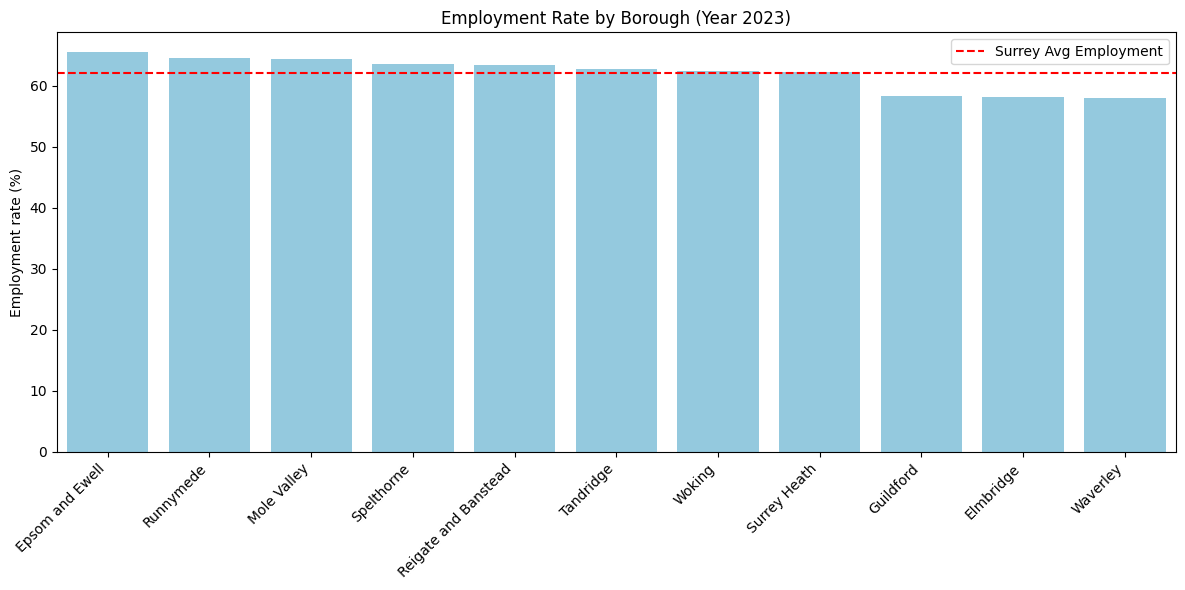

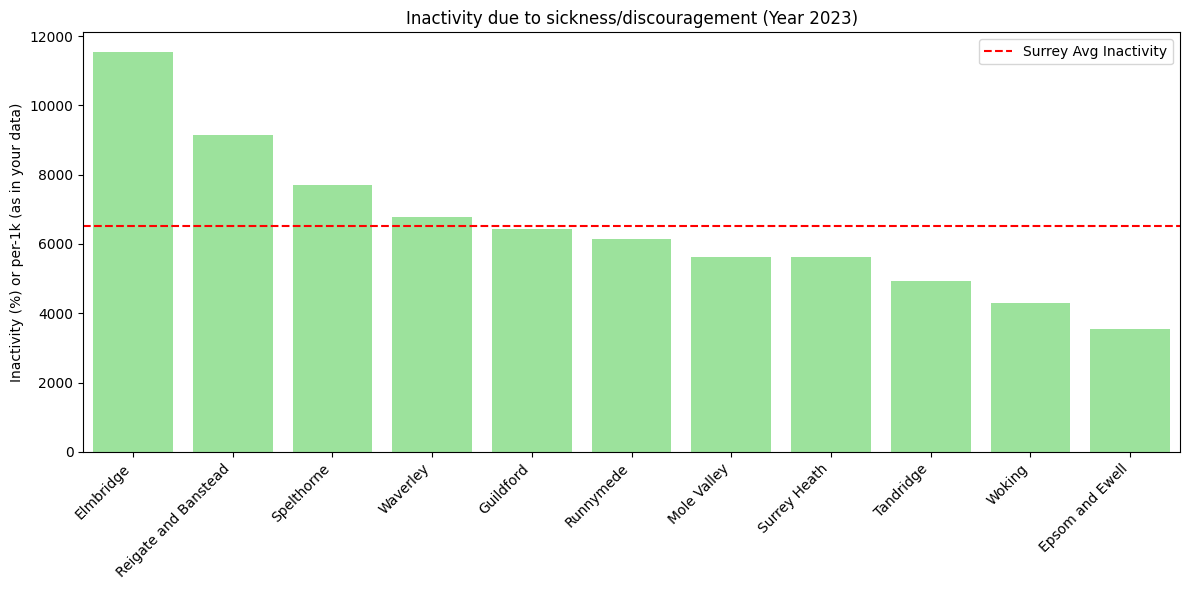

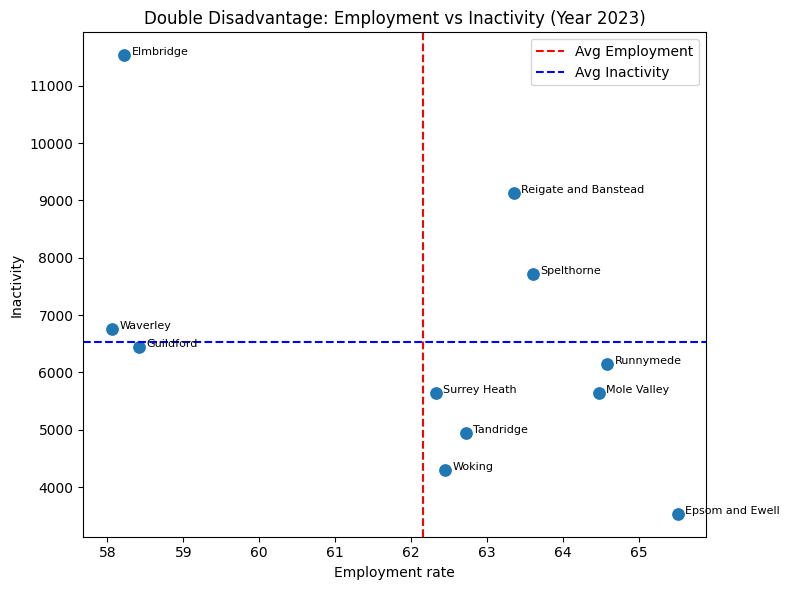

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use the dataframe already built
df_plot = labour_summary

print("Columns:", df_plot.columns.tolist())
print(df_plot.head())


def pick(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    raise KeyError(f"None of {candidates} found in columns: {df.columns.tolist()}")

name_col  = pick(df_plot, ["borough_name", "LAD_name", "lad_name", "AreaName"])
code_col  = pick(df_plot, ["borough_code", "LAD_code", "lad_code", "AreaCode"])
year_col  = pick(df_plot, ["year", "Year"])
emp_col   = pick(df_plot, ["employment_rate", "employment_value", "EmploymentRate"])
inact_col = pick(df_plot, ["inactivity_rate", "inactivity_value", "InactivityRate"])

dfp = df_plot[[name_col, code_col, year_col, emp_col, inact_col]].copy()
dfp[emp_col] = pd.to_numeric(dfp[emp_col], errors="coerce")
dfp[inact_col] = pd.to_numeric(dfp[inact_col], errors="coerce")

# collapse to the latest year if you have multiple years
latest_year = dfp[year_col].max()
dfp = dfp[dfp[year_col] == latest_year].copy()

# Compute Surrey averages for reference lines ---
avg_emp = dfp[emp_col].mean()
avg_inact = dfp[inact_col].mean()

plt.figure(figsize=(12,6))
sns.barplot(data=dfp.sort_values(emp_col, ascending=False),
            x=name_col, y=emp_col, color="skyblue")
plt.axhline(avg_emp, color="red", linestyle="--", label="Surrey Avg Employment")
plt.title(f"Employment Rate by Borough (Year {latest_year})")
plt.ylabel("Employment rate (%)")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=dfp.sort_values(inact_col, ascending=False),
            x=name_col, y=inact_col, color="lightgreen")
plt.axhline(avg_inact, color="red", linestyle="--", label="Surrey Avg Inactivity")
plt.title(f"Inactivity due to sickness/discouragement (Year {latest_year})")
plt.ylabel("Inactivity (%) or per-1k (as in your data)")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=dfp, x=emp_col, y=inact_col, s=100)
plt.axvline(avg_emp, color="red", linestyle="--", label="Avg Employment")
plt.axhline(avg_inact, color="blue", linestyle="--", label="Avg Inactivity")
plt.title(f"Double Disadvantage: Employment vs Inactivity (Year {latest_year})")
plt.xlabel("Employment rate")
plt.ylabel("Inactivity")
# annotate points with borough names
for _, r in dfp.iterrows():
    plt.text(r[emp_col]+0.1, r[inact_col]+0.1, r[name_col], fontsize=8)
plt.legend()
plt.tight_layout()
plt.show()


Top 3 Employment Boroughs:
      borough_name  employment_rate
1  Epsom and Ewell        65.506897
5        Runnymede        64.583636
3      Mole Valley        64.470690

Bottom 3 Employment Boroughs:
  borough_name  employment_rate
9     Waverley        58.056000
0    Elmbridge        58.217722
2    Guildford        58.418644


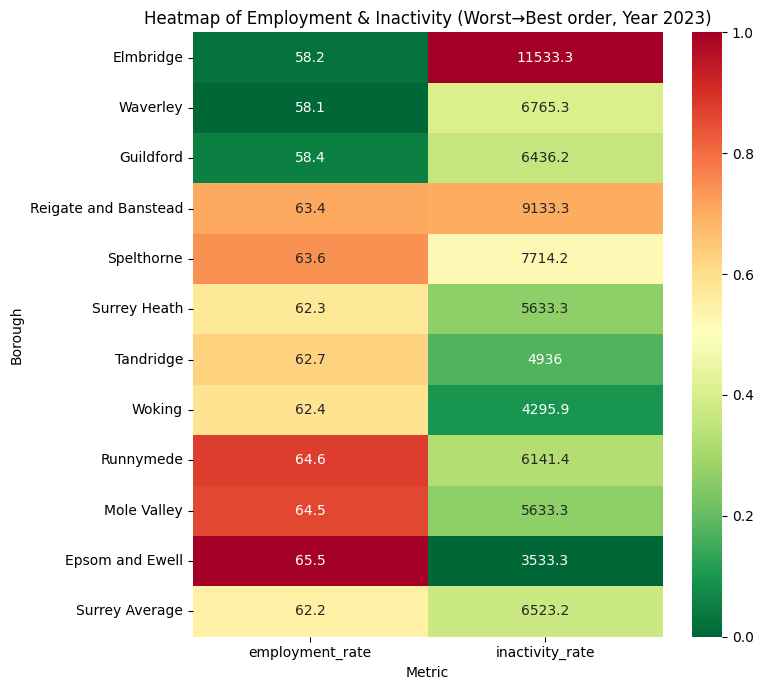

In [ ]:
# Top 3 & Bottom 3 in employment
top3 = dfp.sort_values(emp_col, ascending=False).head(3)
bottom3 = dfp.sort_values(emp_col, ascending=True).head(3)

print("Top 3 Employment Boroughs:")
print(top3[[name_col, emp_col]])

print("\nBottom 3 Employment Boroughs:")
print(bottom3[[name_col, emp_col]])

#Heatmap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



emp_risk   = dfp[emp_col].rank(ascending=True,  method="average")   # low employment -> small rank -> worse
inact_risk = dfp[inact_col].rank(ascending=False, method="average") # high inactivity -> small rank -> worse
dfp["risk_score"] = emp_risk + inact_risk

df_sorted = dfp.sort_values("risk_score", ascending=True).copy()


vals = df_sorted[[emp_col, inact_col]].copy()

colors = vals.copy()
for c in colors.columns:
    mn, mx = colors[c].min(), colors[c].max()
    colors[c] = (colors[c] - mn) / (mx - mn + 1e-9)   # avoid div-by-zero

avg_row_vals = pd.DataFrame({emp_col: [dfp[emp_col].mean()],
                             inact_col: [dfp[inact_col].mean()]},
                            index=["Surrey Average"])
vals = pd.concat([vals.set_index(df_sorted[name_col]), avg_row_vals], axis=0)

avg_row_colors = avg_row_vals.copy()
for c in avg_row_colors.columns:
    mn, mx = dfp[c].min(), dfp[c].max()
    avg_row_colors[c] = (avg_row_colors[c] - mn) / (mx - mn + 1e-9)
colors = pd.concat([colors.set_index(df_sorted[name_col]), avg_row_colors.set_index(pd.Index(["Surrey Average"]))], axis=0)

plt.figure(figsize=(8, 7))
ax = sns.heatmap(colors,
                 annot=vals.round(1),
                 fmt="g",
                 cmap="RdYlGn_r",   
                 cbar=True)

ax.set_title(f"Heatmap of Employment & Inactivity (Worst→Best order, Year {latest_year})")
ax.set_xlabel("Metric")
ax.set_ylabel("Borough")

plt.tight_layout()
plt.show()





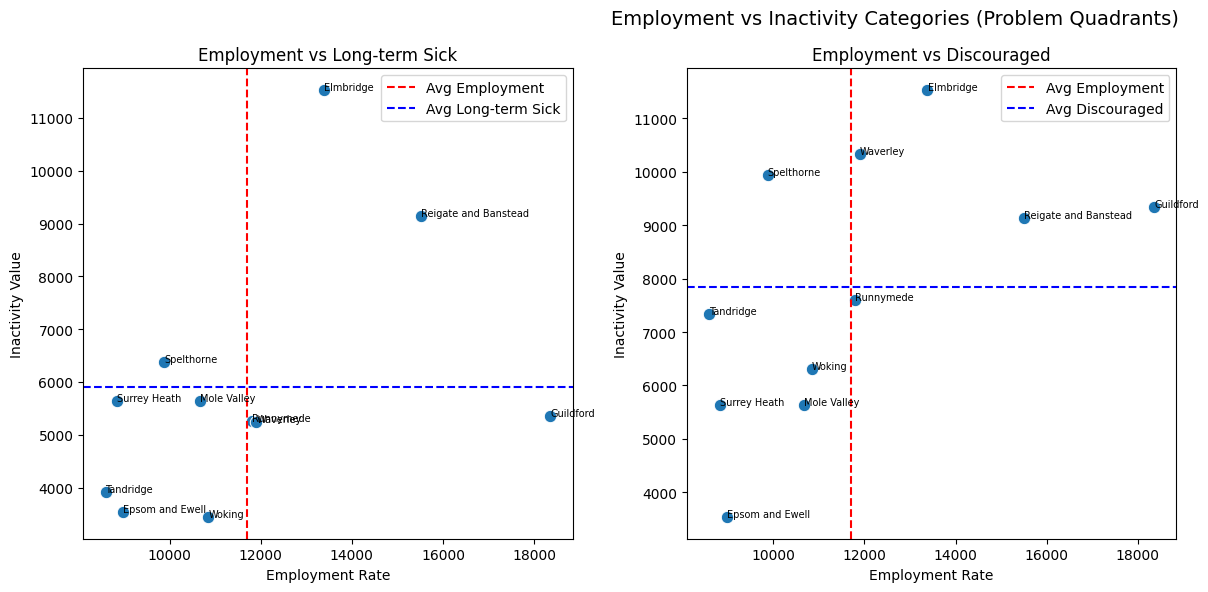

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

dfv = merged.copy()

for col in ["employment_rate", "inactivity_sick", "inactivity_discouraged", "inactivity_wants_job"]:
    dfv[col] = pd.to_numeric(dfv[col], errors="coerce")


dfv = dfv.dropna(subset=["employment_rate"])

fig, axes = plt.subplots(1, 3, figsize=(18,6), sharex=False)

inact_vars = [
    ("inactivity_sick", "Long-term Sick"),
    ("inactivity_discouraged", "Discouraged"),
    ("inactivity_wants_job", "Wants a Job")
]

for ax, (col, title) in zip(axes, inact_vars):
    if col in dfv.columns and dfv[col].notna().any():   
        sns.scatterplot(data=dfv, x="employment_rate", y=col, ax=ax, s=80)

        
        ax.axvline(dfv["employment_rate"].mean(), color="red", linestyle="--", label="Avg Employment")
        ax.axhline(dfv[col].mean(), color="blue", linestyle="--", label=f"Avg {title}")

        
        for _, r in dfv.iterrows():
            if pd.notna(r[col]):
                ax.text(r["employment_rate"]+0.1, r[col]+0.1, r["LAD_name"], fontsize=7)

        ax.set_title(f"Employment vs {title}")
        ax.set_xlabel("Employment Rate")
        ax.set_ylabel("Inactivity Value")
        ax.legend()
    else:
        ax.set_visible(False) 

plt.suptitle("Employment vs Inactivity Categories (Problem Quadrants)", fontsize=14)
plt.tight_layout()
plt.show()


THIS IS TO GET PIP DATA INTO PROPER FORMAT


In [ ]:
import re
import unicodedata
import numpy as np
import pandas as pd
from openpyxl import load_workbook


FILE = r"C:\Users\SHABI\OneDrive\Desktop\DISSERTATION\PIP SURREY DISABILITY\PIP - disability.xlsx"
SHEET_INDEX = 0   


SURREY_BOROUGHS_IN_FILE_ORDER = [
    "***Surrey LAs",  
    "Elmbridge", "Epsom and Ewell", "Guildford", "Mole Valley", "Reigate and Banstead",
    "Runnymede", "Spelthorne", "Surrey Heath", "Tandridge", "Waverley", "Woking"
]

CONDITIONS_ORDERED = [
    "Anaemia","Haemolytic disorders","Metabolic red cell disorders","Clotting disorders",
    "Platelet disorders","Blood disorders","Viral diseases","Bacterial diseases",
    "Protozoal diseases","Other infectious diseases","Cancers of the gastrointestinal tract",
    "Cancers of the respiratory tract","Cancers of the genitourinary tract",
    "Cancers of the haematological system","Cancers of the skin",
    "Cancer of the brain and spinal cord","Cancers of bone","Cancer of breast",
    "Unknown primary","Cancers of the adrenal gland","Other cancers","Other sarcomas",
    "Hyperlipidaemia","Inborn errors of metabolism","Amyloidosis","Porphyria",
    "Obesity","Other metabolic diseases",

    
    "Personality disorder","Specific learning disorder","Stress reactions",
    "Anxiety disorders","Obsessive compulsive disorder",
    "Mixed anxiety and depressive disorders","Somatoform and dissociative disorders",
    "Mood disorders","Psychotic disorders","Cognitive disorders",
    "Eating disorders","Substance (mis) use disorders","Factitious disorder",
    "Learning disability global","Autistic spectrum disorders","Hyperkinetic disorder",
    "Conduct disorder (including oppositional defiant disorder)","Enuresis",
    "Faecal soiling (encopresis)","Other psychiatric disorders of childhood",

    
    "Cerebrovascular disease","Epilepsy","Non epileptic disturbance of consciousness",
    "Movement disorders","Multiple sclerosis","Benign tumours","Hydrocephalus",
    "Headache","Head injury","Spinal cord compression","Degenerative neuronal diseases",
    "Cerebral palsy","Spina bifida","Ataxia","Neuropathy","Peripheral nerve injury",
    "Disease of muscle","Muscular dystrophy","Infections","Other neurological disorders",
    "Diseases of conjunctiva, cornea, eyelids and lacrimal apparatus","Uveitis","Glaucoma",
    "Injuries - Visual","Vitreous disease","Diseases of the retina and optic nerve",
    "Cataract","Refractive errors","Disorders of eye movement","Visual field defects",
    "Other diseases affecting vision","Conductive hearing loss",
    "Sensorineural hearing loss","Mixed hearing loss",
    "Other diseases affecting hearing & balance","Aneurysm","Cardiac arrhythmias",
    "Cardiac failure","Cardiomyopathy","Congenital heart disease",
    "Heart transplantation","Hypertension","Ischaemic heart disease (coronary artery disease)",
    "Pericarditis","Valve disease","Peripheral arterial disease",
    "Peripheral venous disease","Other cardiovascular disease",
    "Diseases of the oesophagus, stomach and duodenum","Diseases of the small bowel",
    "Inflammatory bowel disease","Diseases of the colon",
    "Diseases of the rectum and anus","Irritable bowel syndrome",
    "Benign tumours of the gastrointestinal tract","Abdominal hernias",
    "Congenital disorders of the GI tract","Other diseases of the gastrointestinal tract",
    "Chronic hepatitis","Cirrhosis","Liver failure","Liver transplantation",
    "Disease of gallbladder and biliary tract","Diseases of the pancreas","Infections and parasites",
    "Papulosquamous and inflammatory rashes","Bullous disease",
    "Diseases of blood vessels/lymphatics","Diseases of collagen and elastic tissue",
    "Burns","Other skin disease","Osteoarthritis","Chronic pain syndromes",
    "Inflammatory arthritis","Crystal deposition disorders",
    "Osteonecrosis and osteochondritis","Metabolic and endocrine disorders",
    "Genetic disorders, dysplasias and malformations","Benign tumours of bone",
    "Fracture complications","Other generalised musculoskeletal disease",
    "Shoulder disorders","Elbow disorders","Wrist and hand disorders",
    "Neck disorders","Non specific back pain","Specific back pain",
    "Hip disorders","Knee disorders","Ankle and foot disorders","Amputations",
    "Injuries/fracture/Dislocation","Other regional musculoskeletal disease",
    "Systemic lupus erythematosus (SLE)","Antiphospholipid syndrome",
    "Systemic sclerosis (scleroderma)","Sjogren’s syndrome","Vasculitis",
    "Other autoimmune disease","Urinary incontinence","Kidney disease",
    "Renal failure","Diseases of bladder, urethra, prostate, testes and penis",
    "Diseases of the ovary, uterus, cervix, vagina and vulva","Other genitourinary disease",
    "Hypothalamic and pituitary disease","Pancreatic disease","Thyroid disease",
    "Adrenal disease","Parathyroid disease","Other endocrine diseases",
    "Diseases of the upper respiratory tract",
    "Chronic obstructive pulmonary disease (chronic bronchitis/emphysema)",
    "Bronchiectasis","Cystic fibrosis","Asthma","Pulmonary fibrosis",
    "Pneumoconiosis","Granulomatous lung disease and pulmonary infiltration",
    "Disease of the pleura","Lung transplantation","Heart and lung transplantation",
    "Pulmonary embolus","Infectious diseases of the respiratory tract",
    "Other diseases of the lower respiratory tract","Multisystem","Extremes of age",
    "Hypersensitivity diseases","Other diseases of the immune system",
    "Unknown or missing"
]


MENTAL_SET = {c.lower() for c in [
    "Personality disorder","Specific learning disorder","Stress reactions",
    "Anxiety disorders","Obsessive compulsive disorder",
    "Mixed anxiety and depressive disorders","Somatoform and dissociative disorders",
    "Mood disorders","Psychotic disorders","Cognitive disorders",
    "Eating disorders","Substance (mis) use disorders","Factitious disorder",
    "Learning disability global","Autistic spectrum disorders","Hyperkinetic disorder",
    "Conduct disorder (including oppositional defiant disorder)","Enuresis",
    "Faecal soiling (encopresis)","Other psychiatric disorders of childhood"
]}


wb = load_workbook(FILE, data_only=True, read_only=True)
ws = wb.worksheets[SHEET_INDEX]
grid = [list(r) for r in ws.iter_rows(values_only=True)]
nrows = len(grid)
ncols = max((len(r) for r in grid), default=0)

def cell(i, j):
    if i < 0 or j < 0 or i >= nrows: return None
    row = grid[i]
    return row[j] if j < len(row) else None

print(f"Loaded sheet: rows={nrows}, cols≈{ncols}")


def norm_txt(s: str) -> str:
    if s is None:
        return ""
    s = str(s)
    s = unicodedata.normalize("NFKD", s).lower()
    s = s.replace("’", "'") 
    s = re.sub(r"[-_/]", " ", s)
    s = re.sub(r"[^a-z0-9\s()&]", "", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

COND_NORM = [norm_txt(c) for c in CONDITIONS_ORDERED]
COND_SET  = set(COND_NORM)

def is_condition_like(x) -> bool:
    t = norm_txt(x)
    if not t: return False
    if t in COND_SET: return True
    
    return any(t.startswith(c) or c in t for c in COND_SET)


search_cols = list(range(min(5, ncols)))
col_hits = {}
for j in search_cols:
    cnt = 0
    for i in range(nrows):
        if is_condition_like(cell(i, j)):
            cnt += 1
    col_hits[j] = cnt

cond_col = max(col_hits, key=col_hits.get)
print("Condition-like hits by column:", col_hits, "→ chosen cond_col:", cond_col)

cond_first_row, cond_last_row = None, None
for i in range(nrows):
    if is_condition_like(cell(i, cond_col)):
        cond_first_row = i
        break
for i in range(nrows - 1, -1, -1):
    if is_condition_like(cell(i, cond_col)):
        cond_last_row = i
        break

if cond_first_row is None or cond_last_row is None:
    print("\nPreview first 60 rows × first 6 cols (original | normalized):")
    prev = []
    for i in range(min(60, nrows)):
        vals = [cell(i, j) for j in range(min(6, ncols))]
        norms = [norm_txt(x) for x in vals]
        prev.append([i] + vals + ["|"] + norms)
    print(pd.DataFrame(prev).to_string(index=False, header=False))
    raise RuntimeError("Could not detect condition start/end. Check preview & adjust.")

print(f"Condition block rows: {cond_first_row} → {cond_last_row}  (cond_col={cond_col})")


la_header_row = None
for i in range(max(0, cond_first_row-15), min(nrows, cond_first_row+15)):
    row_vals = [cell(i, j) for j in range(ncols)]
    if any(isinstance(x, str) and x.strip() == "***Surrey LAs" for x in row_vals):
        la_header_row = i
        break


if la_header_row is None:
    surrey_set = set(SURREY_BOROUGHS_IN_FILE_ORDER[1:])  
    best_row, best_hits = None, 0
    for i in range(min(200, nrows)):
        hits = 0
        for j in range(ncols):
            v = cell(i, j)
            if isinstance(v, str) and v.strip() in surrey_set:
                hits += 1
        if hits > best_hits:
            best_row, best_hits = i, hits
    if best_row is not None and best_hits >= 4:
        la_header_row = best_row

if la_header_row is None:
    raise RuntimeError('Could not detect the borough header row (***Surrey LAs).')


borough_cols = []
for nm in SURREY_BOROUGHS_IN_FILE_ORDER:
    found = None
    for j in range(1, ncols):  
        v = cell(la_header_row, j)
        if isinstance(v, str) and v.strip() == nm:
            found = j
            break
    if found is None:
        raise RuntimeError(f'Could not find borough header "{nm}" on row {la_header_row}')
    borough_cols.append(found)

month_label, year_val = None, None
month_regex = re.compile(r"(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[A-Za-z\-\s]*\d{2,4}", re.IGNORECASE)
for i in range(0, la_header_row+1):
    for j in range(0, min(40, ncols)):
        v = cell(i, j)
        if isinstance(v, str) and month_regex.search(v):
            month_label = v.strip()
            break
    if month_label:
        break
if month_label:
    m = re.search(r"(20\d{2})", month_label)
    if m: year_val = int(m.group(1))
print("Month label:", month_label, "| Year:", year_val)


rows = []
for r in range(cond_first_row, cond_last_row + 1):
    cond_raw = cell(r, cond_col)
    if not isinstance(cond_raw, str): 
        continue
    cond_name = cond_raw.strip()
    
    if not is_condition_like(cond_name):
        continue

    
    for b_name, b_col in zip(SURREY_BOROUGHS_IN_FILE_ORDER[1:], borough_cols[1:]):
        val = cell(r, b_col)
        
        if isinstance(val, str) and val.strip() in ("..", ".", "-", "—", ""):
            val = None
        vnum = pd.to_numeric(val, errors="coerce")
        if pd.notna(vnum):
            rows.append({
                "borough_name": b_name,
                "condition": cond_name,
                "claims": float(vnum),
                "month": month_label,
                "year": year_val
            })

pip_long = pd.DataFrame(rows)
if pip_long.empty:
    raise RuntimeError("No data extracted. Check detected ranges & headers printed above.")


pip_long["group"] = np.where(
    pip_long["condition"].str.lower().isin(MENTAL_SET),
    "mental", "physical"
)


print("\nTidy PIP (first 15 rows):")
print(pip_long.head(15).to_string(index=False))


top5 = (pip_long.sort_values(["borough_name","claims"], ascending=[True, False])
               .groupby("borough_name")
               .head(5))
print("\nTop‑5 conditions per borough:")
print(top5.to_string(index=False))


heat = pip_long.pivot_table(index="borough_name",
                            columns="condition",
                            values="claims",
                            aggfunc="sum",
                            fill_value=0)


pip_long.to_csv(r"C:\Users\SHABI\OneDrive\Desktop\DISSERTATION\PIP SURREY DISABILITY\pip_disability_long.csv", index=False)



Loaded sheet: rows=205, cols≈14
Condition-like hits by column: {0: 0, 1: 179, 2: 0, 3: 0, 4: 0} → chosen cond_col: 1
Condition block rows: 12 → 201  (cond_col=1)
Month label: Jan-25 | Year: None

Tidy PIP (first 15 rows):
        borough_name            condition  claims  month year    group
           Elmbridge              Anaemia     5.0 Jan-25 None physical
Reigate and Banstead Haemolytic disorders     5.0 Jan-25 None physical
           Guildford   Clotting disorders     6.0 Jan-25 None physical
          Spelthorne   Clotting disorders     7.0 Jan-25 None physical
           Tandridge   Clotting disorders     5.0 Jan-25 None physical
     Epsom and Ewell      Blood disorders     5.0 Jan-25 None physical
           Runnymede      Blood disorders     6.0 Jan-25 None physical
        Surrey Heath      Blood disorders     6.0 Jan-25 None physical
           Elmbridge       Viral diseases    14.0 Jan-25 None physical
     Epsom and Ewell       Viral diseases    12.0 Jan-25 None physic

THIS IS TO SPLIT MENTAL HEALTH AND PHYSICAL HEALTH

In [ ]:
import pandas as pd


file = r"C:\Users\SHABI\OneDrive\Desktop\DISSERTATION\PIP SURREY DISABILITY\pip_disability_long.csv"
pip_df = pd.read_csv(file)


mental_conditions = [
    "Personality disorder", "Specific learning disorder", "Stress reactions",
    "Anxiety disorders", "Obsessive compulsive disorder",
    "Mixed anxiety and depressive disorders", "Somatoform and dissociative disorders",
    "Mood disorders", "Psychotic disorders", "Cognitive disorders",
    "Eating disorders", "Substance (mis) use disorders", "Factitious disorder",
    "Learning disability global", "Autistic spectrum disorders",
    "Hyperkinetic disorder", "Conduct disorder (including oppositional defiant disorder)"
]


pip_df["group"] = pip_df["condition"].apply(
    lambda x: "mental" if x in mental_conditions else "physical"
)


print(pip_df.groupby("group")["claims"].sum())
print(pip_df.head())


group
mental      16509.0
physical    21538.0
Name: claims, dtype: float64
           borough_name             condition  claims   month  year     group
0             Elmbridge               Anaemia     5.0  Jan-25   NaN  physical
1  Reigate and Banstead  Haemolytic disorders     5.0  Jan-25   NaN  physical
2             Guildford    Clotting disorders     6.0  Jan-25   NaN  physical
3            Spelthorne    Clotting disorders     7.0  Jan-25   NaN  physical
4             Tandridge    Clotting disorders     5.0  Jan-25   NaN  physical


ANALYSIS ON PIP DATA FOR MY UNDERSTANDING

In [27]:
top5_conditions = (
    pip_df.groupby("condition")["claims"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print("Top 5 conditions across Surrey:\n", top5_conditions)
top3_per_borough = (
    pip_df.groupby(["borough_name", "condition"])["claims"]
    .sum()
    .reset_index()
    .sort_values(["borough_name", "claims"], ascending=[True, False])
    .groupby("borough_name")
    .head(3)
)
print("Top 3 conditions per borough:\n", top3_per_borough)
split_per_borough = (
    pip_df.groupby(["borough_name", "group"])["claims"]
    .sum()
    .reset_index()
    .pivot(index="borough_name", columns="group", values="claims")
    .fillna(0)
)
print("Mental vs Physical split per borough:\n", split_per_borough)




Top 5 conditions across Surrey:
 condition
Autistic spectrum disorders               3655.0
Mixed anxiety and depressive disorders    3404.0
Learning disability global                2213.0
Osteoarthritis                            2172.0
Chronic pain syndromes                    1614.0
Name: claims, dtype: float64
Top 3 conditions per borough:
               borough_name                               condition  claims
54               Elmbridge  Mixed anxiety and depressive disorders   343.0
7                Elmbridge             Autistic spectrum disorders   323.0
66               Elmbridge                          Osteoarthritis   218.0
150        Epsom and Ewell  Mixed anxiety and depressive disorders   216.0
148        Epsom and Ewell              Learning disability global   185.0
103        Epsom and Ewell             Autistic spectrum disorders   183.0
192              Guildford             Autistic spectrum disorders   457.0
243              Guildford  Mixed anxiety and depres

VISULAIZATION ON PIP DATASET ALONE

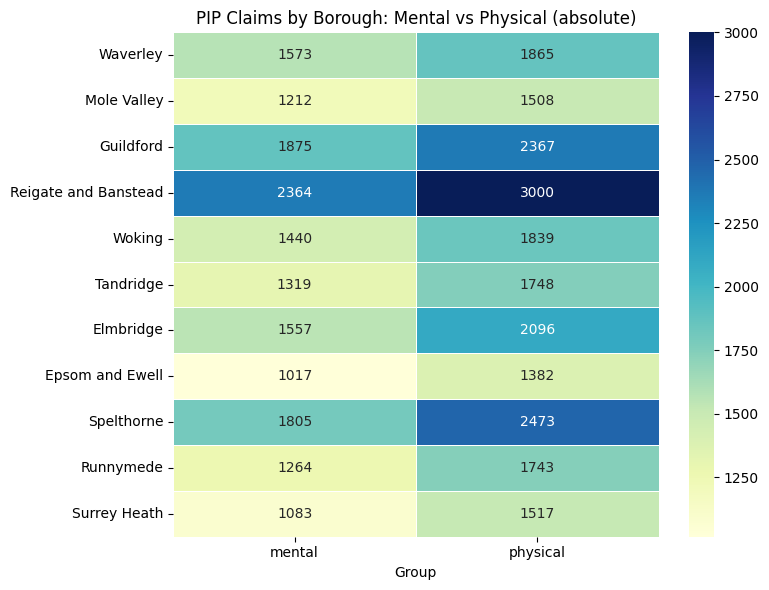

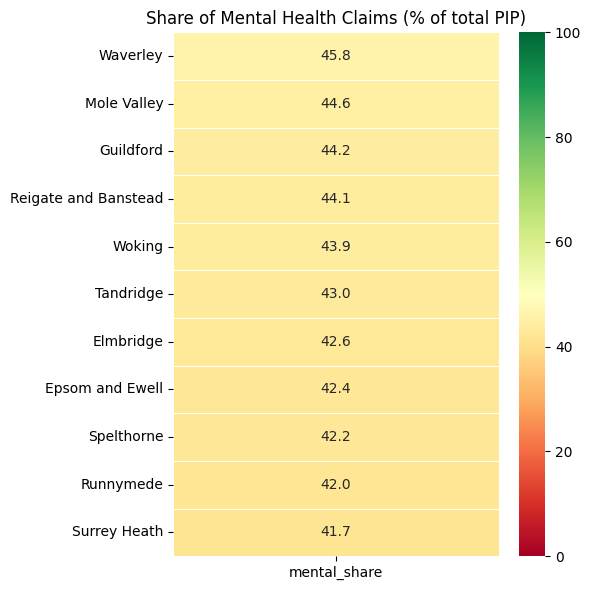

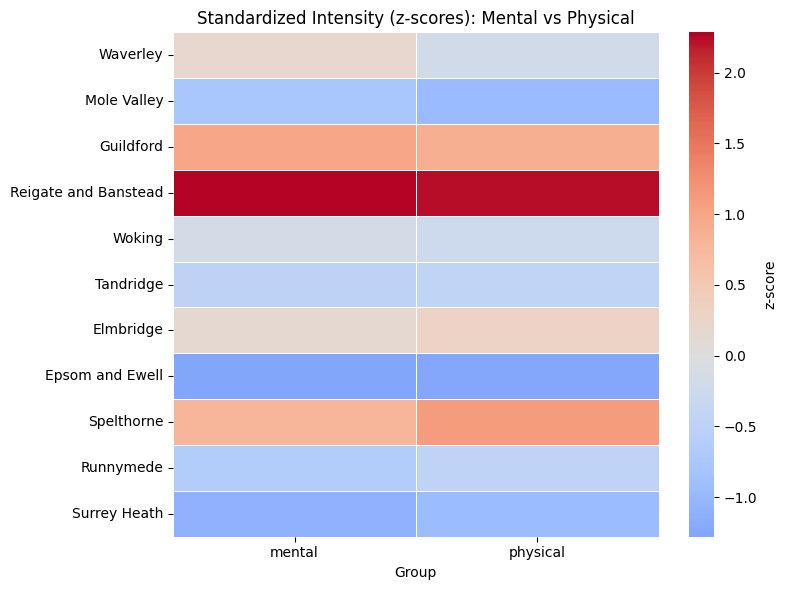

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


split_per_borough = (
    pip_df.groupby(['borough_name','group'])['claims']
          .sum()
          .reset_index()
          .pivot(index='borough_name', columns='group', values='claims')
          .fillna(0)
)


for col in ['mental','physical']:
    if col not in split_per_borough.columns:
        split_per_borough[col] = 0


split_per_borough['total_claims'] = split_per_borough['mental'] + split_per_borough['physical']
split_per_borough['mental_share'] = np.where(
    split_per_borough['total_claims'] > 0,
    split_per_borough['mental'] / split_per_borough['total_claims'],
    0.0
)


order = split_per_borough.sort_values(['mental_share','total_claims'], ascending=[False, False]).index
heat_abs = split_per_borough.loc[order, ['mental','physical']]
heat_share = split_per_borough.loc[order, ['mental_share']]  # 0..1


plt.figure(figsize=(8, 6))
sns.heatmap(
    heat_abs,
    annot=True, fmt=".0f", linewidths=.5, linecolor='white',
    cmap='YlGnBu'
)
plt.title('PIP Claims by Borough: Mental vs Physical (absolute)')
plt.xlabel('Group')
plt.ylabel('')
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 6))
sns.heatmap(
    heat_share*100,  
    annot=True, fmt=".1f", linewidths=.5, linecolor='white',
    cmap='RdYlGn', vmin=0, vmax=100
)
plt.title('Share of Mental Health Claims (% of total PIP)')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()


z = heat_abs.apply(lambda c: (c - c.mean())/c.std(ddof=0), axis=0)
plt.figure(figsize=(8, 6))
sns.heatmap(
    z, center=0, cmap='coolwarm', linewidths=.5, linecolor='white',
    cbar_kws={'label':'z-score'}
)
plt.title('Standardized Intensity (z-scores): Mental vs Physical')
plt.xlabel('Group')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [ ]:
print(labour_summary.head(10))

           borough_name borough_code  year  employment_rate  inactivity_rate  \
0             Elmbridge    E07000207  2023        58.217722     11533.333333   
1       Epsom and Ewell    E07000208  2023        65.506897      3533.333333   
2             Guildford    E07000209  2023        58.418644      6436.236364   
3           Mole Valley    E07000210  2023        64.470690      5633.333333   
4  Reigate and Banstead    E07000211  2023        63.351316      9133.333333   
5             Runnymede    E07000212  2023        64.583636      6141.362500   
6            Spelthorne    E07000213  2023        63.604054      7714.225000   
7          Surrey Heath    E07000214  2023        62.324638      5633.333333   
8             Tandridge    E07000215  2023        62.715493      4935.980000   
9              Waverley    E07000216  2023        58.056000      6765.280000   

   low_employment  high_inactivity  weak_labour_market  
0            True             True                True  
1    

           borough_name  employment_rate  inactivity_rate  weak_labour_market  \
0             Elmbridge        58.217722     11533.333333                True   
1       Epsom and Ewell        65.506897      3533.333333               False   
2             Guildford        58.418644      6436.236364               False   
3           Mole Valley        64.470690      5633.333333               False   
4  Reigate and Banstead        63.351316      9133.333333               False   

   pip_mental_claims  pip_physical_claims  total_claims  mental_share  
0             1557.0               2096.0        3653.0      0.426225  
1             1017.0               1382.0        2399.0      0.423927  
2             1875.0               2367.0        4242.0      0.442008  
3             1212.0               1508.0        2720.0      0.445588  
4             2364.0               3000.0        5364.0      0.440716  


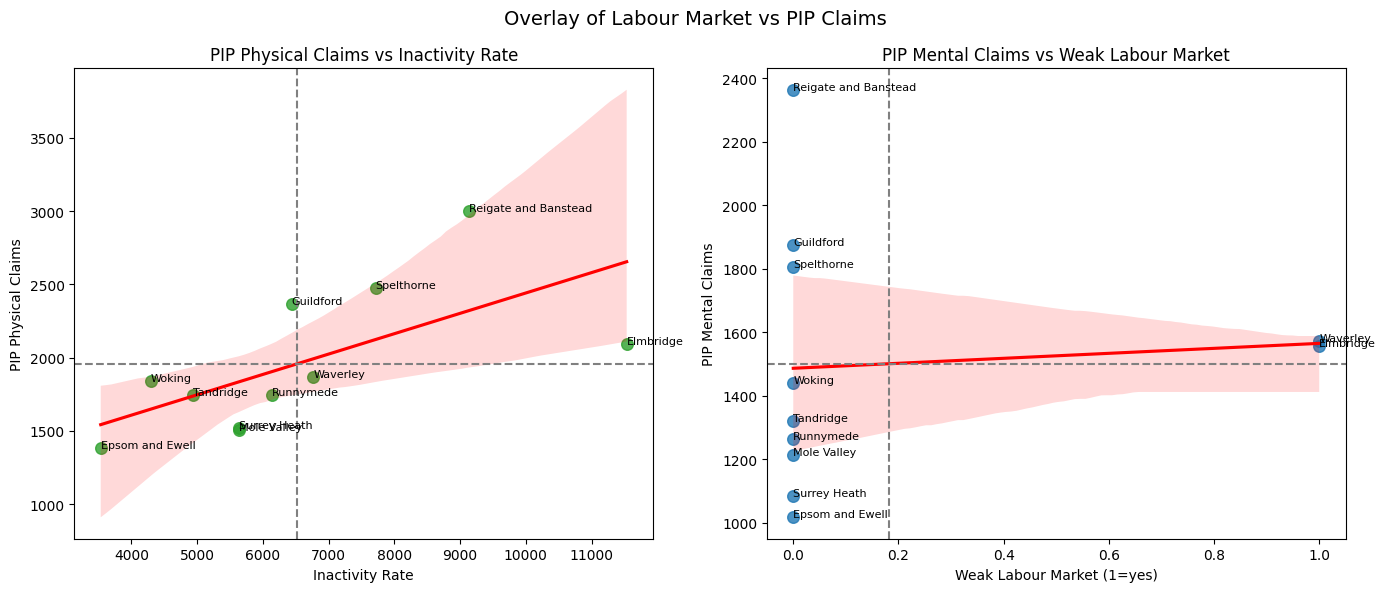

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


name_col = "borough_name"
emp_col = "employment_rate"
inactivity_col = "inactivity_rate"  
proxy_discouraged = "weak_labour_market" if "weak_labour_market" in labour_summary.columns else None


split_per_borough = split_per_borough.rename(
    columns={"mental": "pip_mental_claims", "physical": "pip_physical_claims"}
)
for c in ["pip_mental_claims","pip_physical_claims"]:
    if c not in split_per_borough.columns:
        split_per_borough[c] = 0


labour_ok = labour_summary[[name_col, emp_col, inactivity_col, "weak_labour_market"]].drop_duplicates()

combined_df = labour_ok.merge(
    split_per_borough,
    left_on=name_col,
    right_index=True,
    how="inner"
)

print(combined_df.head())


plots = []


plots.append(("PIP Physical Claims vs Inactivity Rate",
              inactivity_col, "pip_physical_claims",
              "Inactivity Rate", "PIP Physical Claims", "tab:green"))


if proxy_discouraged:
    plots.append(("PIP Mental Claims vs Weak Labour Market",
                  proxy_discouraged, "pip_mental_claims",
                  "Weak Labour Market (1=yes)", "PIP Mental Claims", "tab:blue"))
else:
    print("\nNOTE: No discouraged proxy available. Skipping mental overlay plot.")


n = len(plots)
fig, axes = plt.subplots(1, n, figsize=(7*n, 6))

if n == 1:
    axes = [axes]

for ax, (title, xcol, ycol, xlabel, ylabel, color) in zip(axes, plots):
    sns.regplot(
        data=combined_df, x=xcol, y=ycol, ax=ax,
        scatter_kws={"s":70, "color":color},
        line_kws={"color":"red"}
    )
    ax.axvline(combined_df[xcol].mean(), ls="--", color="grey")
    ax.axhline(combined_df[ycol].mean(), ls="--", color="grey")
    for _, r in combined_df.iterrows():
        ax.text(r[xcol], r[ycol], r[name_col], fontsize=8)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

plt.suptitle("Overlay of Labour Market vs PIP Claims", fontsize=14)
plt.tight_layout()
plt.show()


           borough_name  employment_rate  inactivity_rate  weak_labour_market  \
0             Elmbridge        58.217722     11533.333333                True   
1       Epsom and Ewell        65.506897      3533.333333               False   
2             Guildford        58.418644      6436.236364               False   
3           Mole Valley        64.470690      5633.333333               False   
4  Reigate and Banstead        63.351316      9133.333333               False   

   pip_mental_claims  pip_physical_claims  total_claims  mental_share  
0             1557.0               2096.0        3653.0      0.426225  
1             1017.0               1382.0        2399.0      0.423927  
2             1875.0               2367.0        4242.0      0.442008  
3             1212.0               1508.0        2720.0      0.445588  
4             2364.0               3000.0        5364.0      0.440716  


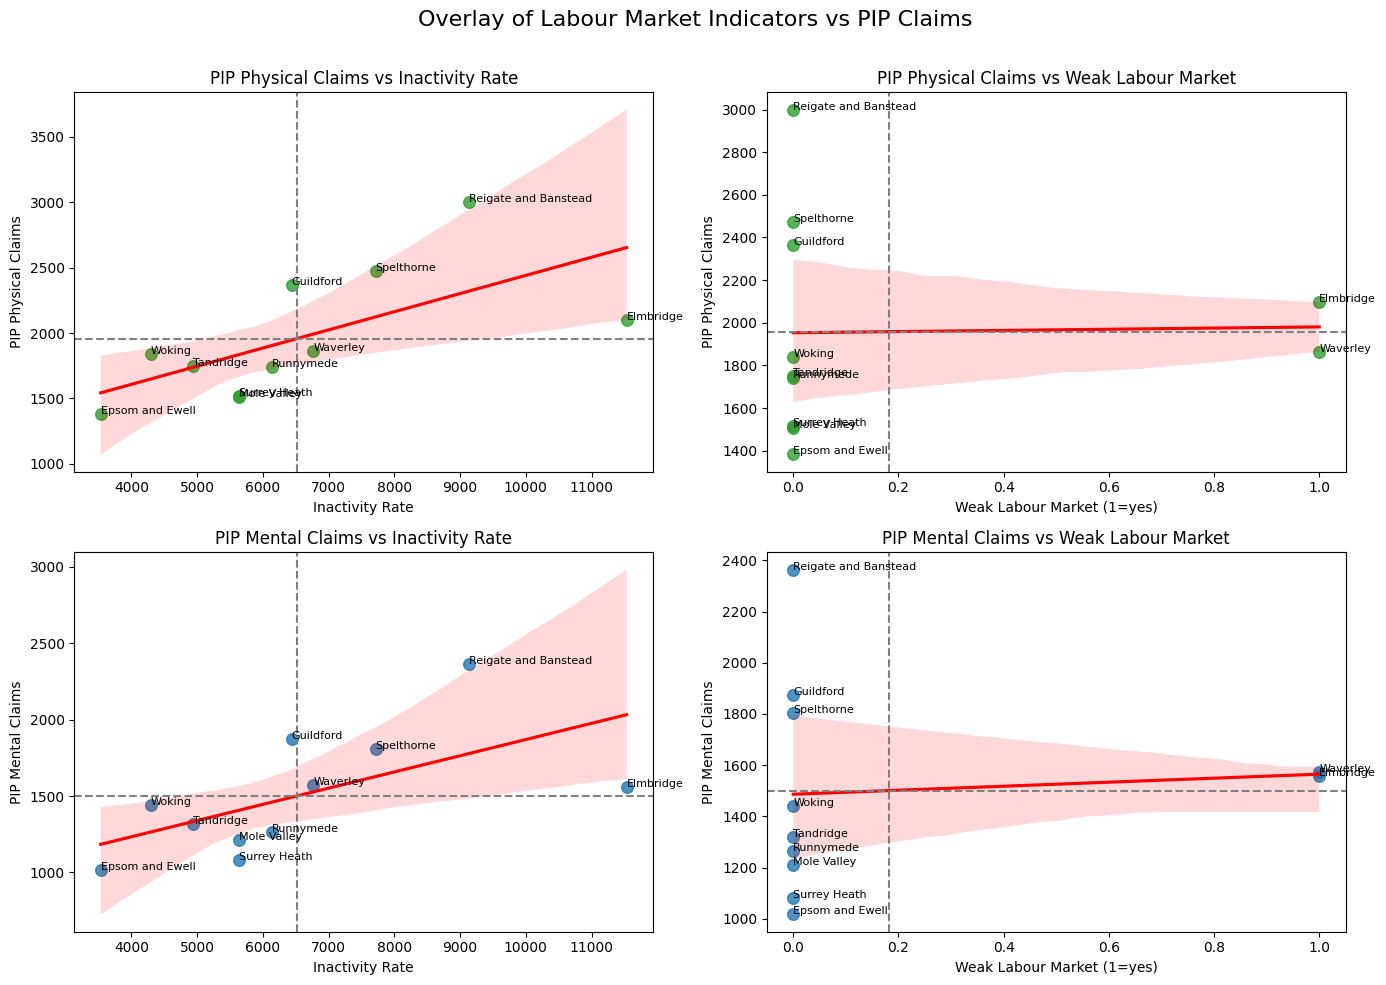

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


name_col = "borough_name"
emp_col = "employment_rate"
inactivity_col = "inactivity_rate"   
proxy_discouraged = "weak_labour_market" if "weak_labour_market" in labour_summary.columns else None


split_per_borough = split_per_borough.rename(
    columns={"mental": "pip_mental_claims", "physical": "pip_physical_claims"}
)
for c in ["pip_mental_claims","pip_physical_claims"]:
    if c not in split_per_borough.columns:
        split_per_borough[c] = 0


labour_ok = labour_summary[[name_col, emp_col, inactivity_col, "weak_labour_market"]].drop_duplicates()

combined_df = labour_ok.merge(
    split_per_borough,
    left_on=name_col,
    right_index=True,
    how="inner"
)

print(combined_df.head())


plots = [
    ("PIP Physical Claims vs Inactivity Rate",
     inactivity_col, "pip_physical_claims",
     "Inactivity Rate", "PIP Physical Claims", "tab:green"),

    ("PIP Physical Claims vs Weak Labour Market",
     proxy_discouraged, "pip_physical_claims",
     "Weak Labour Market (1=yes)", "PIP Physical Claims", "tab:green"),

    ("PIP Mental Claims vs Inactivity Rate",
     inactivity_col, "pip_mental_claims",
     "Inactivity Rate", "PIP Mental Claims", "tab:blue"),

    ("PIP Mental Claims vs Weak Labour Market",
     proxy_discouraged, "pip_mental_claims",
     "Weak Labour Market (1=yes)", "PIP Mental Claims", "tab:blue")
]


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, (title, xcol, ycol, xlabel, ylabel, color) in zip(axes.flatten(), plots):
    sns.regplot(
        data=combined_df, x=xcol, y=ycol, ax=ax,
        scatter_kws={"s":70, "color":color},
        line_kws={"color":"red"}
    )
    ax.axvline(combined_df[xcol].mean(), ls="--", color="grey")
    ax.axhline(combined_df[ycol].mean(), ls="--", color="grey")
    for _, r in combined_df.iterrows():
        ax.text(r[xcol], r[ycol], r[name_col], fontsize=8)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

plt.suptitle("Overlay of Labour Market Indicators vs PIP Claims", fontsize=16)
plt.tight_layout(rect=[0,0,1,0.97])
plt.show()


MACHINE LEARNING

Data preview:
           borough_name  employment_rate  inactivity_rate  weak_labour_market  \
0             Elmbridge        58.217722     11533.333333                   1   
1       Epsom and Ewell        65.506897      3533.333333                   0   
2             Guildford        58.418644      6436.236364                   0   
3           Mole Valley        64.470690      5633.333333                   0   
4  Reigate and Banstead        63.351316      9133.333333                   0   

   pip_mental_claims  pip_physical_claims  
0             1557.0               2096.0  
1             1017.0               1382.0  
2             1875.0               2367.0  
3             1212.0               1508.0  
4             2364.0               3000.0   

Silhouette scores: {2: 0.2963604543284091, 3: 0.5220077293361084, 4: 0.4104001864815032}
Inertias: {2: 39.24325611303668, 3: 12.24229531105529, 4: 8.768836640653046}
Chosen k (clusters): 3

Cluster summary (feature means):
          

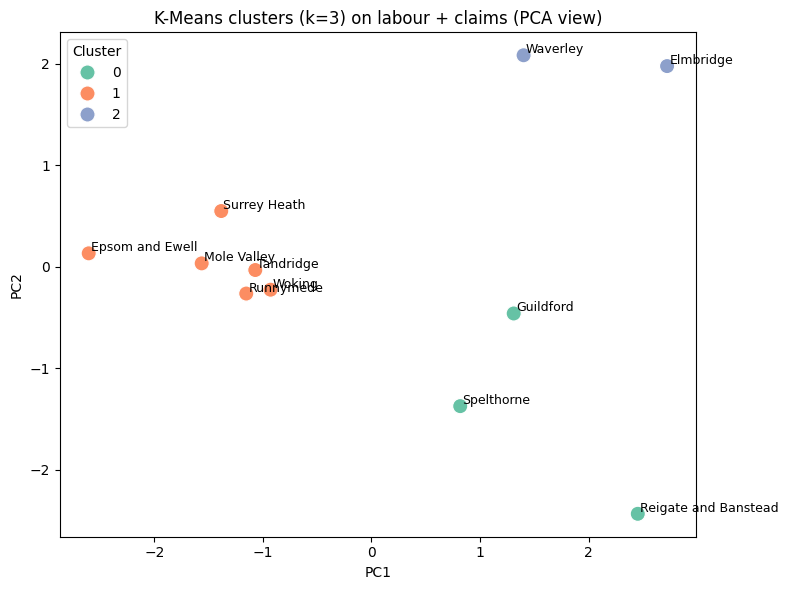

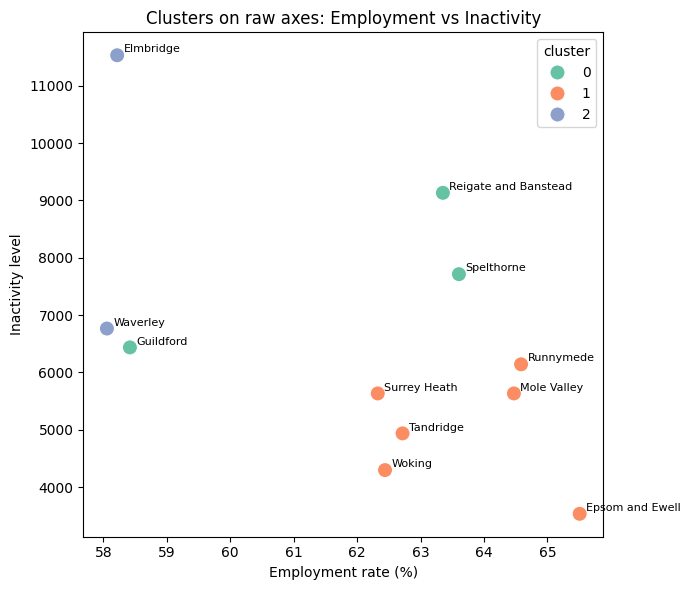


CV performance (Leave-One-Out):
— Physical claims
LinearReg:  MAE=409.5,  R²=nan


c:\Users\SHABI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SHABI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SHABI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SHABI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SHABI\AppData\Local\Programs\Python\Python3

RidgeReg:  MAE=421.4,  R²=nan


c:\Users\SHABI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SHABI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SHABI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SHABI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SHABI\AppData\Local\Programs\Python\Python3

RandomForest:  MAE=349.2,  R²=nan

— Mental claims
LinearReg:  MAE=368.3,  R²=nan
RidgeReg:  MAE=374.7,  R²=nan


c:\Users\SHABI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SHABI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SHABI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SHABI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\SHABI\AppData\Local\Programs\Python\Python3

RandomForest:  MAE=295.4,  R²=nan

Linear model coefficients (Physical):
employment_rate       -70.278
inactivity_rate         0.193
weak_labour_market   -937.883
dtype: float64

Linear model coefficients (Mental):
employment_rate       -67.843
inactivity_rate         0.137
weak_labour_market   -694.833
dtype: float64

Scenario: +2 pts employment rate — predicted claim changes
            borough_name  phys_now  phys_after  phys_delta  ment_now  \
0              Elmbridge    2436.0      2295.0      -141.0    1886.0   
1        Epsom and Ewell    1315.0      1174.0      -141.0     990.0   
2              Guildford    2374.0      2234.0      -141.0    1869.0   
3            Mole Valley    1794.0      1653.0      -141.0    1348.0   
4   Reigate and Banstead    2549.0      2408.0      -141.0    1904.0   
5              Runnymede    1884.0      1743.0      -141.0    1410.0   
6             Spelthorne    2257.0      2116.0      -141.0    1692.0   
7           Surrey Heath    1944.0      1804

c:\Users\SHABI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor


req = ['borough_name','employment_rate','inactivity_rate',
       'weak_labour_market','pip_mental_claims','pip_physical_claims']
missing = [c for c in req if c not in combined_df.columns]
if missing:
    raise ValueError(f"combined_df is missing columns: {missing}")


df = combined_df.copy()
df['weak_labour_market'] = df['weak_labour_market'].astype(int)   # bool -> 0/1
df = df.dropna(subset=req)

print("Data preview:")
print(df[req].head(), "\n")


cluster_features = [
    'employment_rate',       
    'inactivity_rate',       
    'weak_labour_market',    
    'pip_mental_claims',     
    'pip_physical_claims'    
]

X_raw = df[cluster_features].values
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)


k_candidates = [2, 3, 4]
sil_scores = {}
inertias = {}

for k in k_candidates:
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    lab = km.fit_predict(X)
    inertias[k] = km.inertia_
    sil_scores[k] = silhouette_score(X, lab)

print("Silhouette scores:", sil_scores)
print("Inertias:", inertias)


k_best = max(sil_scores, key=lambda k: (sil_scores[k], -k))
print(f"Chosen k (clusters): {k_best}")

kmeans = KMeans(n_clusters=k_best, n_init='auto', random_state=42)
df['cluster'] = kmeans.fit_predict(X)


cluster_summary = (df
    .groupby('cluster')[cluster_features]
    .mean()
    .sort_index()
    .round(1)
)
print("\nCluster summary (feature means):\n", cluster_summary)

def label_cluster(row):
    return (
        "A: High inactivity + high claims" if
        (row['inactivity_rate'] > df['inactivity_rate'].median() and
         (row['pip_mental_claims'] + row['pip_physical_claims']) >
         (df['pip_mental_claims'] + df['pip_physical_claims']).median())
        else "B/C: Lower"
    )
df['cluster_label'] = df.apply(label_cluster, axis=1)

pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X)
df['pc1'] = coords[:,0]
df['pc2'] = coords[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='pc1', y='pc2', hue='cluster', palette='Set2', s=120)
for _, r in df.iterrows():
    plt.text(r['pc1']+0.02, r['pc2']+0.02, r['borough_name'], fontsize=9)
plt.title(f"K-Means clusters (k={k_best}) on labour + claims (PCA view)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


plt.figure(figsize=(7,6))
sns.scatterplot(data=df, x='employment_rate', y='inactivity_rate',
                hue='cluster', palette='Set2', s=120)
for _, r in df.iterrows():
    plt.text(r['employment_rate']+0.1, r['inactivity_rate']+50,
             r['borough_name'], fontsize=8)
plt.title("Clusters on raw axes: Employment vs Inactivity")
plt.xlabel("Employment rate (%)")
plt.ylabel("Inactivity level")
plt.tight_layout()
plt.show()


X_pred = df[['employment_rate','inactivity_rate','weak_labour_market']].copy()
y_phys = df['pip_physical_claims'].copy()
y_ment = df['pip_mental_claims'].copy()


loo = LeaveOneOut()

def eval_model(model, X, y, name):
    mae = -cross_val_score(model, X, y,
                           scoring='neg_mean_absolute_error',
                           cv=loo).mean()

    r2  =  cross_val_score(model, X, y,
                           scoring='r2',
                           cv=loo).mean()
    print(f"{name}:  MAE={mae:.1f},  R²={r2:.2f}")
    return mae, r2

print("\nCV performance (Leave-One-Out):")
lin = LinearRegression()
ridge = Ridge(alpha=1.0, random_state=42)
rf = RandomForestRegressor(n_estimators=300, random_state=42)

print("— Physical claims")
_ = eval_model(lin,   X_pred, y_phys, "LinearReg")
_ = eval_model(ridge, X_pred, y_phys, "RidgeReg")
_ = eval_model(rf,    X_pred, y_phys, "RandomForest")

print("\n— Mental claims")
_ = eval_model(lin,   X_pred, y_ment, "LinearReg")
_ = eval_model(ridge, X_pred, y_ment, "RidgeReg")
_ = eval_model(rf,    X_pred, y_ment, "RandomForest")


lin_phys = LinearRegression().fit(X_pred, y_phys)
lin_ment = LinearRegression().fit(X_pred, y_ment)

coef_phys = pd.Series(lin_phys.coef_, index=X_pred.columns)
coef_ment = pd.Series(lin_ment.coef_, index=X_pred.columns)

print("\nLinear model coefficients (Physical):")
print(coef_phys.round(3))
print("\nLinear model coefficients (Mental):")
print(coef_ment.round(3))


def scenario_delta_employment(delta_points=2.0):
    """
    Increase employment rate by `delta_points` (absolute percentage points).
    Returns a dataframe with predicted before/after and estimated change.
    """
    X0 = X_pred.copy()
    X1 = X_pred.copy()
    X1['employment_rate'] = X1['employment_rate'] + delta_points

    pred_phys_0 = lin_phys.predict(X0)
    pred_phys_1 = lin_phys.predict(X1)
    pred_ment_0 = lin_ment.predict(X0)
    pred_ment_1 = lin_ment.predict(X1)

    out = df[[ 'borough_name' ]].copy()
    out['phys_now']  = pred_phys_0.round(0)
    out['phys_after']= pred_phys_1.round(0)
    out['phys_delta']= (pred_phys_1 - pred_phys_0).round(0)
    out['ment_now']  = pred_ment_0.round(0)
    out['ment_after']= pred_ment_1.round(0)
    out['ment_delta']= (pred_ment_1 - pred_ment_0).round(0)
    return out.sort_values('phys_delta')

scenario = scenario_delta_employment(delta_points=2.0)
print("\nScenario: +2 pts employment rate — predicted claim changes")
print(scenario)


             borough_name                               condition  claims
6               Elmbridge  Mixed anxiety and depressive disorders   343.0
20        Epsom and Ewell  Mixed anxiety and depressive disorders   216.0
29              Guildford             Autistic spectrum disorders   457.0
43            Mole Valley             Autistic spectrum disorders   259.0
58   Reigate and Banstead             Autistic spectrum disorders   497.0
72              Runnymede             Autistic spectrum disorders   292.0
91             Spelthorne  Mixed anxiety and depressive disorders   425.0
100          Surrey Heath             Autistic spectrum disorders   293.0
114             Tandridge             Autistic spectrum disorders   312.0
128              Waverley             Autistic spectrum disorders   384.0
143                Woking             Autistic spectrum disorders   339.0


C:\Users\SHABI\AppData\Local\Temp\ipykernel_40396\424322671.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


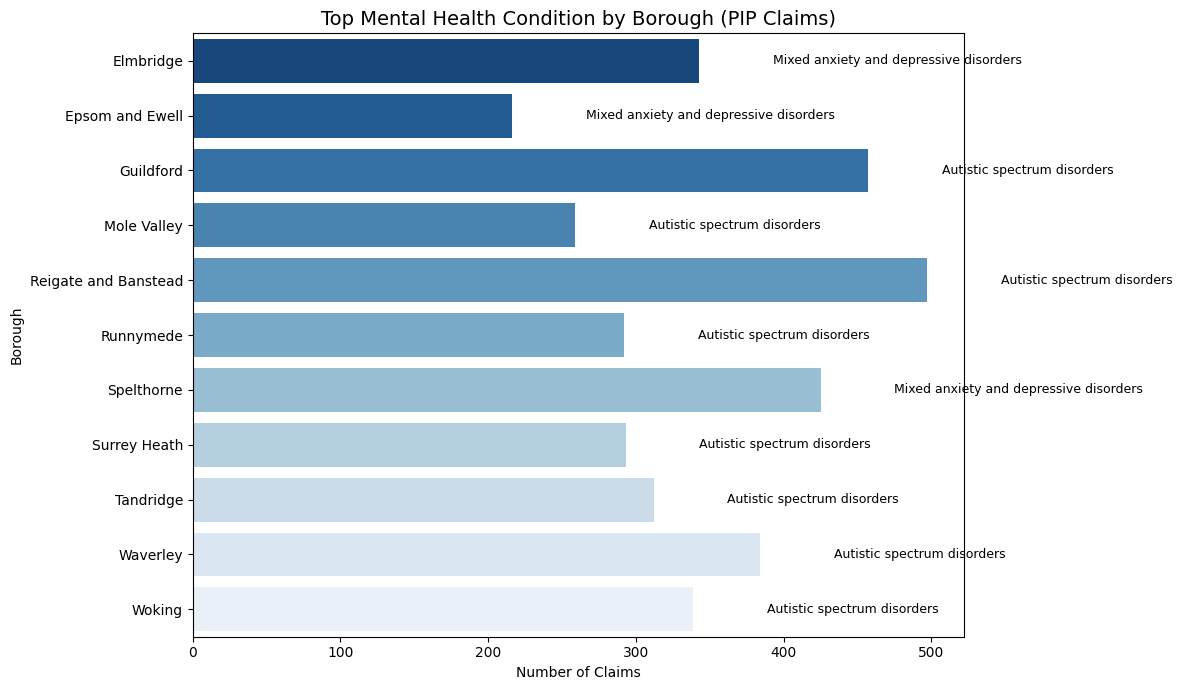

In [ ]:
mental_df = pip_df[pip_df["group"] == "mental"].copy()
top_mental_per_borough = (
    mental_df.groupby(["borough_name", "condition"])["claims"]
    .sum()
    .reset_index()
    .sort_values(["borough_name", "claims"], ascending=[True, False])
    .groupby("borough_name")
    .head(1)   
)

print(top_mental_per_borough)

plt.figure(figsize=(12,7))
sns.barplot(
    data=top_mental_per_borough,
    x="claims", y="borough_name",
    palette="Blues_r"
)


for i, row in top_mental_per_borough.iterrows():
    plt.text(
        row["claims"]+50, 
        row["borough_name"],
        row["condition"],
        va="center", fontsize=9
    )

plt.title("Top Mental Health Condition by Borough (PIP Claims)", fontsize=14)
plt.xlabel("Number of Claims")
plt.ylabel("Borough")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


print("Before fix dtypes:\n", combined_df.dtypes)


num_cols = [
    "pip_physical_claims", "pip_mental_claims",
    "inactivity_rate", "employment_rate"
]
for c in num_cols:
    if c in combined_df.columns:
        combined_df[c] = pd.to_numeric(combined_df[c], errors="coerce")


if "weak_labour_market" in combined_df.columns:
    if combined_df["weak_labour_market"].dtype == bool:
        combined_df["weak_labour_market"] = combined_df["weak_labour_market"].astype(int)
    else:
        combined_df["weak_labour_market"] = (
            combined_df["weak_labour_market"]
            .astype(str).str.strip().str.lower()
            .map({"1":1, "yes":1, "true":1, "0":0, "no":0, "false":0})
            .astype("float64")
        )

phys_vars = ["pip_physical_claims", "inactivity_rate", "weak_labour_market"]
ment_vars = ["pip_mental_claims",   "inactivity_rate", "weak_labour_market"]

df_phys = combined_df[phys_vars].replace([np.inf, -np.inf], np.nan).dropna()
df_ment = combined_df[ment_vars].replace([np.inf, -np.inf], np.nan).dropna()

print("\nAfter coercion dtypes (phys):\n", df_phys.dtypes)
print("Rows kept (phys):", len(df_phys))
print("\nAfter coercion dtypes (ment):\n", df_ment.dtypes)
print("Rows kept (ment):", len(df_ment))

X_phys = sm.add_constant(df_phys[["inactivity_rate", "weak_labour_market"]])
y_phys = df_phys["pip_physical_claims"]

X_ment = sm.add_constant(df_ment[["inactivity_rate", "weak_labour_market"]])
y_ment = df_ment["pip_mental_claims"]

model_phys = sm.OLS(y_phys, X_phys).fit(cov_type="HC3")
model_ment = sm.OLS(y_ment, X_ment).fit(cov_type="HC3")

print("\n=== Physical Claims Regression (robust SE) ===")
print(model_phys.summary())
print("\n=== Mental Claims Regression (robust SE) ===")
print(model_ment.summary())


Before fix dtypes:
 borough_name            object
employment_rate        float64
inactivity_rate        float64
weak_labour_market        bool
pip_mental_claims      float64
pip_physical_claims    float64
total_claims           float64
mental_share           float64
dtype: object

After coercion dtypes (phys):
 pip_physical_claims    float64
inactivity_rate        float64
weak_labour_market       int64
dtype: object
Rows kept (phys): 11

After coercion dtypes (ment):
 pip_mental_claims     float64
inactivity_rate       float64
weak_labour_market      int64
dtype: object
Rows kept (ment): 11

=== Physical Claims Regression (robust SE) ===
                             OLS Regression Results                            
Dep. Variable:     pip_physical_claims   R-squared:                       0.597
Model:                             OLS   Adj. R-squared:                  0.496
Method:                  Least Squares   F-statistic:                     1.327
Date:                 Mon, 25 Aug

OAKLEAF DATA CLEANING

In [ ]:
import pandas as pd

oakleaf_df = pd.read_csv(r"C:\Users\SHABI\OneDrive\Desktop\DISSERTATION\Oakleaf__Data.csv")


oakleaf_df = oakleaf_df.fillna("NA")


oakleaf_df = oakleaf_df.drop_duplicates()


cat_cols = [
    "Live/Closed",
    "Has a mental health issue?",
    "Has an impairment/ disability?",
    "Has a learning disability?"
]

for col in cat_cols:
    oakleaf_df[col] = oakleaf_df[col].astype(str).str.strip().replace("", "NA")


date_cols = [c for c in oakleaf_df.columns if "date" in c.lower()]
for col in date_cols:
    oakleaf_df[col] = pd.to_datetime(oakleaf_df[col], errors="coerce")


attend_cols = [c for c in oakleaf_df.columns if "Number of attendances" in c]
for col in attend_cols:
    oakleaf_df[col] = pd.to_numeric(oakleaf_df[col], errors="coerce").fillna(0).astype(int)

print("\n=== Column Data Types ===")
print(oakleaf_df.dtypes)

print("\n=== Sample Cleaned Data ===")
print(oakleaf_df.head())



=== Column Data Types ===
Postcode                                                                                                             object
Borough Council                                                                                                      object
Live/Closed                                                                                                          object
Has a mental health issue?                                                                                           object
Current mental health information                                                                                    object
Past mental health information                                                                                       object
Has an impairment/ disability?                                                                                       object
Physical Disability                                                                                      

C:\Users\SHABI\AppData\Local\Temp\ipykernel_40396\1077444232.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oakleaf_df[col] = pd.to_datetime(oakleaf_df[col], errors="coerce")
C:\Users\SHABI\AppData\Local\Temp\ipykernel_40396\1077444232.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oakleaf_df[col] = pd.to_datetime(oakleaf_df[col], errors="coerce")
C:\Users\SHABI\AppData\Local\Temp\ipykernel_40396\1077444232.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oakleaf_df[col] = pd.to_datetime(oakleaf_df[col], errors="coerce")
C:\Users\SHABI\AppData\Local\Temp\ipy

OAKLEAF DATA ANALYSIS

In [ ]:
status_counts = oakleaf_df.groupby(["Borough Council", "Live/Closed"]).size().unstack(fill_value=0)
print("\n=== Live vs Closed Clients per Borough ===")
print(status_counts)
mh_status = oakleaf_df.groupby(["Live/Closed", "Current mental health information"]).size().unstack(fill_value=0)

print("\n=== Mental Health Issues by Client Status ===")
print(mh_status)
borough_counts = oakleaf_df["Borough Council"].value_counts()
print("\n=== Clients per Borough (Overall) ===")
print(borough_counts)



=== Live vs Closed Clients per Borough ===
Live/Closed            Closed  Live
Borough Council                    
Basingstoke and Deane       1     0
Elmbridge                  12     7
Epsom & Ewell               9     1
Guildford                 739   231
Hart                       15     4
Mole Valley                34     9
NA                        411     0
Other                      59    20
Runnymede                  33     5
Rushmoor                   42     9
Spelthorne                 15     2
Surrey Heath               73    22
Waverley                  312    97
Woking                    116    37

=== Mental Health Issues by Client Status ===
Current mental health information  Agoraphobia, Anxiety  \
Live/Closed                                               
Closed                                                1   
Live                                                  0   

Current mental health information  Agoraphobia, Anxiety, Autism, Depression, MH Other  \
Live/Cl

OAKLEAF DATA VISUALIZATION

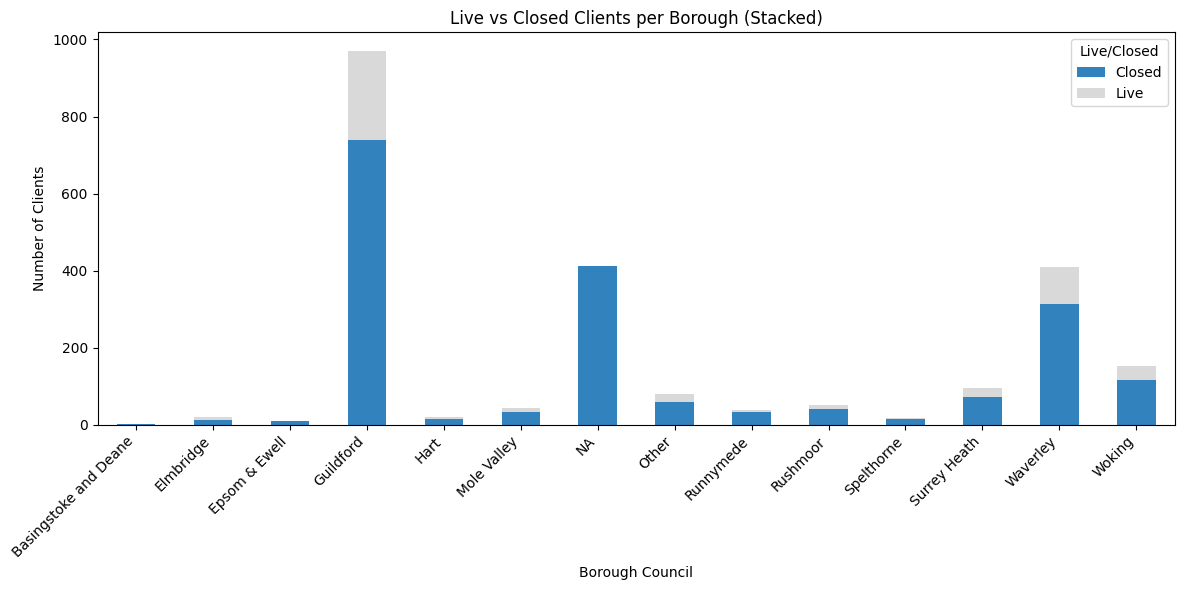

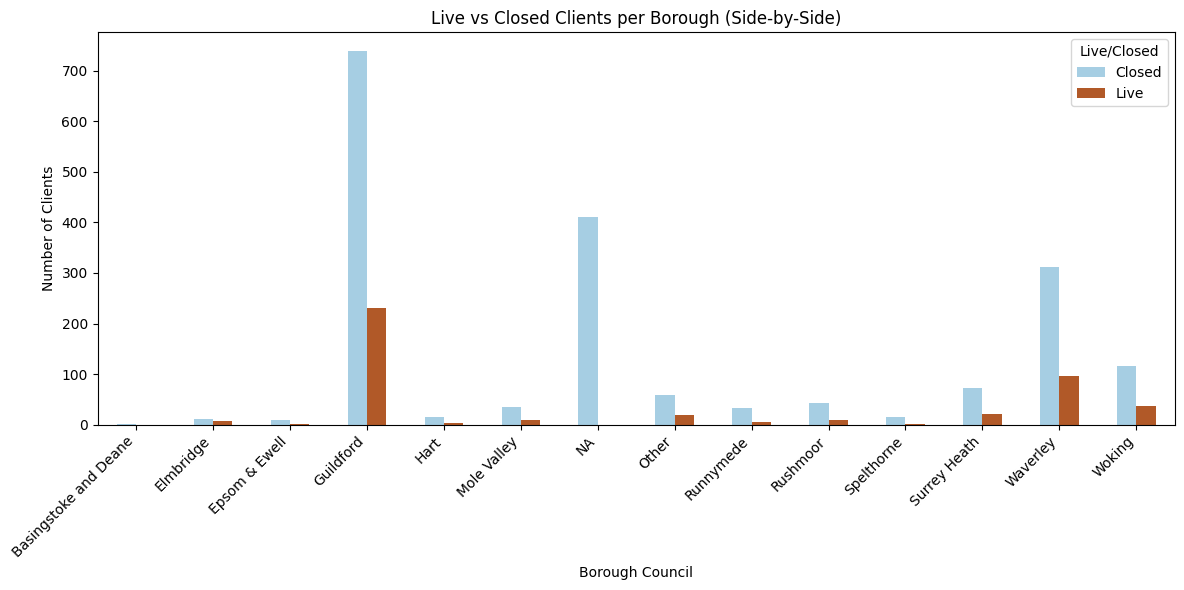

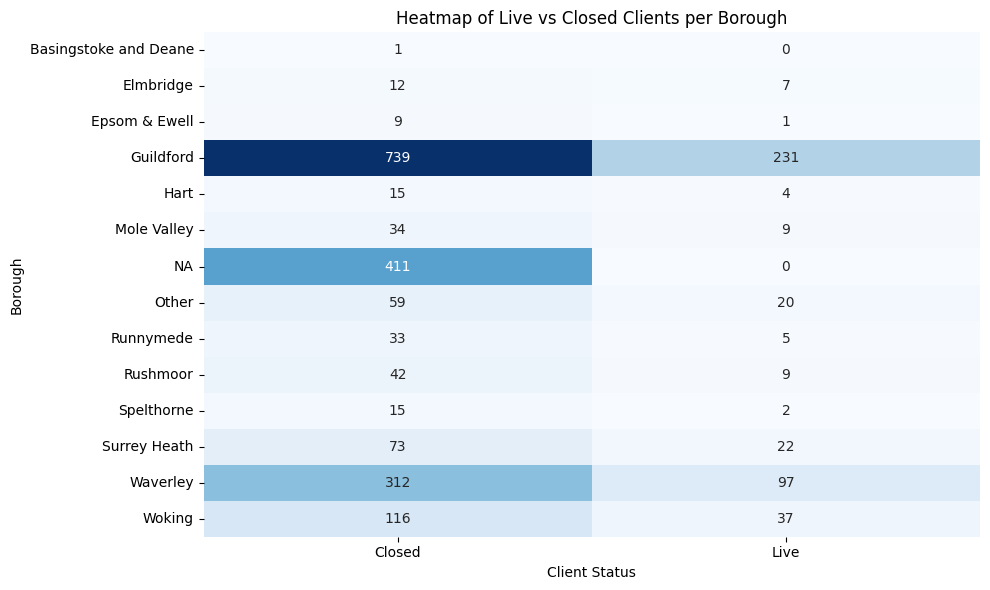

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

status_counts = oakleaf_df.groupby(["Borough Council", "Live/Closed"]).size().unstack(fill_value=0)


status_counts.plot(kind="bar", stacked=True, figsize=(12,6), colormap="tab20c")
plt.title("Live vs Closed Clients per Borough (Stacked)")
plt.ylabel("Number of Clients")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

status_counts.plot(kind="bar", stacked=False, figsize=(12,6), colormap="Paired")
plt.title("Live vs Closed Clients per Borough (Side-by-Side)")
plt.ylabel("Number of Clients")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(status_counts, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Heatmap of Live vs Closed Clients per Borough")
plt.ylabel("Borough")
plt.xlabel("Client Status")
plt.tight_layout()
plt.show()


C:\Users\SHABI\AppData\Local\Temp\ipykernel_40396\134917037.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=mh_counts.index, x=mh_counts.values, palette="viridis")


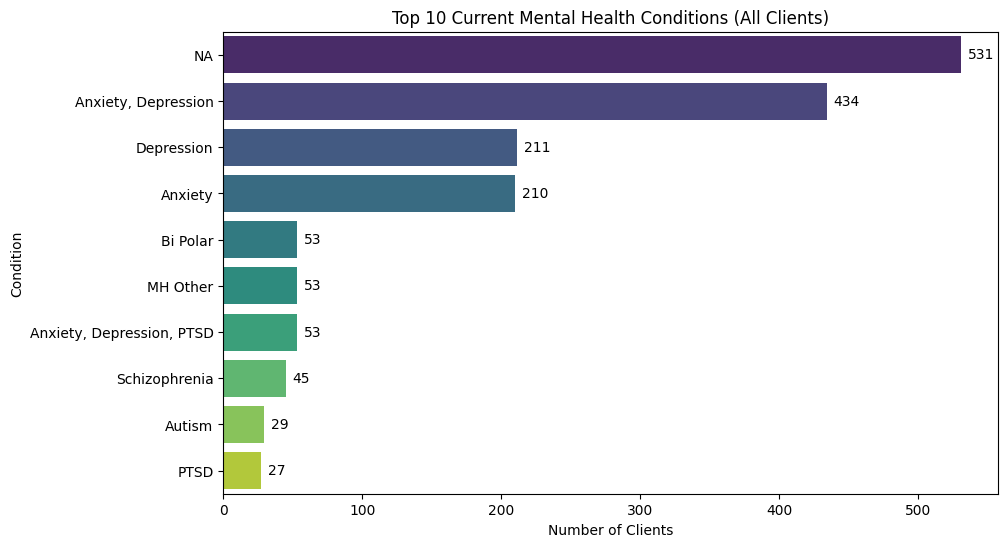

<Figure size 1200x600 with 0 Axes>

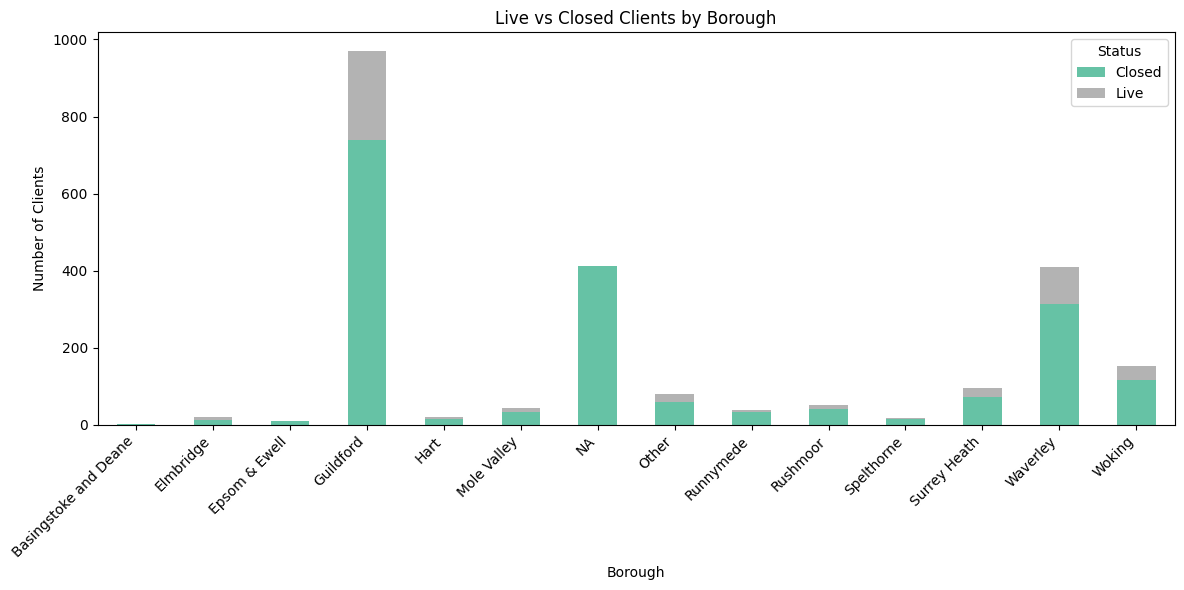

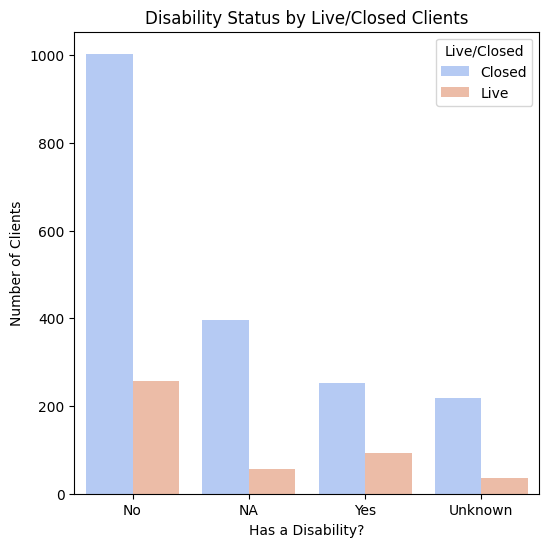

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


mh_counts = (
    oakleaf_df["Current mental health information"]
    .fillna("NA")
    .value_counts()
    .head(10)   
)

plt.figure(figsize=(10,6))
sns.barplot(y=mh_counts.index, x=mh_counts.values, palette="viridis")
for i, v in enumerate(mh_counts.values):
    plt.text(v + 5, i, str(v), va='center')
plt.title("Top 10 Current Mental Health Conditions (All Clients)")
plt.xlabel("Number of Clients")
plt.ylabel("Condition")
plt.show()


status_borough = pd.crosstab(oakleaf_df["Borough Council"], oakleaf_df["Live/Closed"])

plt.figure(figsize=(12,6))
status_borough.plot(kind="bar", stacked=True, figsize=(12,6), colormap="Set2")
plt.title("Live vs Closed Clients by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Clients")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Status")
plt.tight_layout()
plt.show()


plt.figure(figsize=(6,6))
sns.countplot(data=oakleaf_df, x="Has an impairment/ disability?", hue="Live/Closed", palette="coolwarm")
plt.title("Disability Status by Live/Closed Clients")
plt.xlabel("Has a Disability?")
plt.ylabel("Number of Clients")
plt.show()


PREDICTIVE ANALYTICS

Label counts (0/1):
double_disadvantage
0    9
1    2
Name: count, dtype: int64

Predicted double‑disadvantage boroughs (prob ≥ 0.5):
Empty DataFrame
Columns: [borough_name, pred_prob_double_disadv]
Index: []


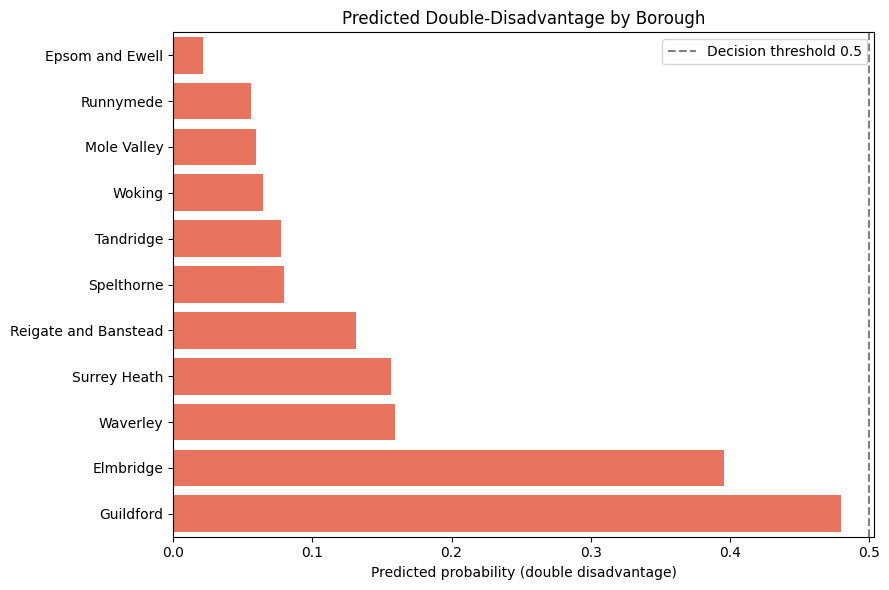

In [ ]:
import pandas as pd
import numpy as np

pip_totals = (
    pip_df.groupby(['borough_name','group'])['claims']
          .sum().unstack(fill_value=0)
          .rename(columns={'mental':'pip_mental_claims','physical':'pip_physical_claims'})
          .reset_index()
)
pip_totals['pip_total'] = pip_totals['pip_mental_claims'] + pip_totals['pip_physical_claims']

combined_df = labour_summary[['borough_name','employment_rate','inactivity_rate','weak_labour_market']].drop_duplicates()
combined_df = combined_df.merge(pip_totals, on='borough_name', how='inner')

for c in ['employment_rate','inactivity_rate','pip_mental_claims','pip_physical_claims','pip_total']:
    combined_df[c] = pd.to_numeric(combined_df[c], errors='coerce')

avg_emp   = combined_df['employment_rate'].mean()
avg_inact = combined_df['inactivity_rate'].mean()
med_pip   = combined_df['pip_total'].median()

combined_df['double_disadvantage'] = (
    (combined_df['employment_rate'] < avg_emp) &
    (combined_df['inactivity_rate'] > avg_inact) &
    (combined_df['pip_total']      >= med_pip)
).astype(int)

print("Label counts (0/1):")
print(combined_df['double_disadvantage'].value_counts(dropna=False))

from sklearn.model_selection import LeaveOneOut, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X = combined_df[['employment_rate','inactivity_rate','pip_mental_claims','pip_physical_claims']].copy()
y = combined_df['double_disadvantage'].values

scaler = StandardScaler()
Xz = scaler.fit_transform(X)

loo = LeaveOneOut()
clf = LogisticRegression(max_iter=500, solver='lbfgs', random_state=42)

proba = cross_val_predict(clf, Xz, y, cv=loo, method='predict_proba')[:,1]
combined_df['pred_prob_double_disadv'] = proba

combined_df['predicted_double_disadv'] = (combined_df['pred_prob_double_disadv'] >= 0.5)

print("\nPredicted double‑disadvantage boroughs (prob ≥ 0.5):")
print(combined_df.loc[combined_df['predicted_double_disadv'], ['borough_name','pred_prob_double_disadv']]
      .sort_values('pred_prob_double_disadv', ascending=False))

import matplotlib.pyplot as plt
import seaborn as sns

plot_df = combined_df[['borough_name','pred_prob_double_disadv']].sort_values('pred_prob_double_disadv', ascending=True)
plt.figure(figsize=(9,6))
sns.barplot(data=plot_df, x='pred_prob_double_disadv', y='borough_name', orient='h', color='tomato')
plt.axvline(0.5, ls='--', color='grey', label='Decision threshold 0.5')
plt.xlabel('Predicted probability (double disadvantage)')
plt.ylabel('')
plt.title('Predicted Double‑Disadvantage by Borough')
plt.legend()
plt.tight_layout()
plt.show()

SCENARIO BASED FORECASTING


Borough-specific scenario statements:
 • Guildford: PIP mental health claims ↓ 12.0% (driven by +100 Autistic spectrum disorders clients). inactivity rate ↓ 2.0% (driven by +100 Autistic spectrum disorders clients). low employment rate ↓ 1.5% (driven by +100 Autistic spectrum disorders clients).
 • Elmbridge: PIP mental health claims ↓ 9.5% (driven by +120 Mixed anxiety & depressive clients). inactivity rate ↓ 1.8% (driven by +120 Mixed anxiety & depressive clients). low employment rate ↓ 1.4% (driven by +120 Mixed anxiety & depressive clients).
 • Waverley: PIP mental health claims ↓ 9.7% (driven by +80 Autistic spectrum disorders clients). inactivity rate ↓ 1.6% (driven by +80 Autistic spectrum disorders clients). low employment rate ↓ 1.2% (driven by +80 Autistic spectrum disorders clients).
 • Surrey Heath: PIP mental health claims ↓ 7.4% (driven by +60 Autistic spectrum disorders clients). inactivity rate ↓ 1.2% (driven by +60 Autistic spectrum disorders clients). low employment 

C:\Users\SHABI\AppData\Local\Temp\ipykernel_40396\315175187.py:186: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results["borough"], rotation=20, ha='right')


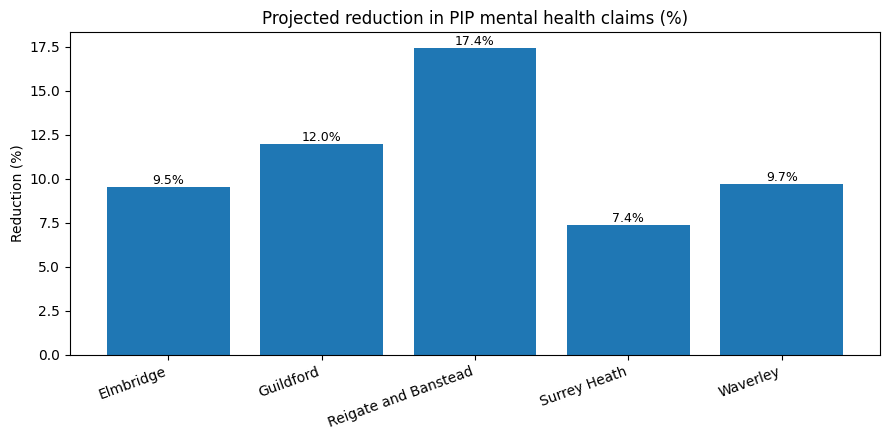

C:\Users\SHABI\AppData\Local\Temp\ipykernel_40396\315175187.py:186: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results["borough"], rotation=20, ha='right')


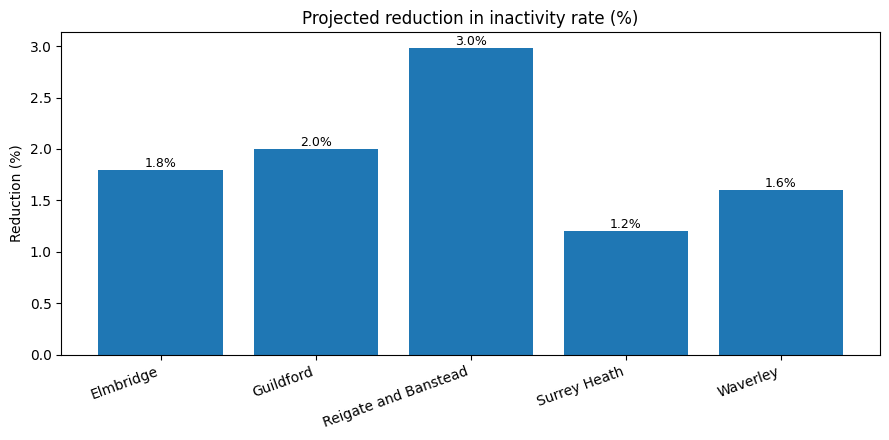

C:\Users\SHABI\AppData\Local\Temp\ipykernel_40396\315175187.py:186: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results["borough"], rotation=20, ha='right')


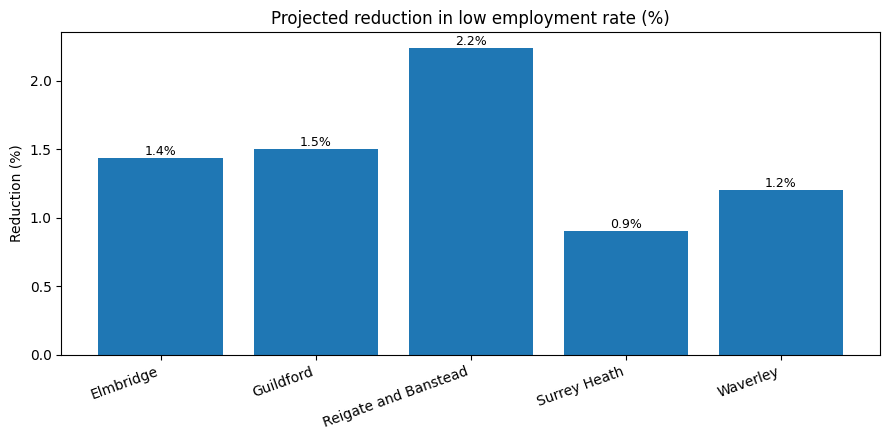


Saved: oakleaf_scenario_forecast.csv


In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


baseline = pd.DataFrame({
    "borough": [
        "Guildford", "Elmbridge", "Waverley", "Surrey Heath", "Reigate and Banstead"
    ],
    "inactivity_rate_pct": [6.0, 11.5, 6.8, 5.6, 9.2],
    "low_employment_rate_pct": [41.0, 60.0, 46.0, 44.0, 49.0],
    "pip_mental_claims": [1850, 2100, 1750, 1600, 2350],
})

top_condition = {
    "Guildford": "Autistic spectrum disorders",
    "Elmbridge": "Mixed anxiety & depressive",
    "Waverley": "Autistic spectrum disorders",
    "Surrey Heath": "Autistic spectrum disorders",
    "Reigate and Banstead": "Autistic spectrum disorders",
}

elasticity_per_100 = {
    "Autistic spectrum disorders": {
        "pip_mental_claims": 0.12,            
        "inactivity_rate_pct": 0.02,          
        "low_employment_rate_pct": 0.015,     
    },
    "Mixed anxiety & depressive": {
        "pip_mental_claims": 0.08,
        "inactivity_rate_pct": 0.015,
        "low_employment_rate_pct": 0.012,
    },

scenario_clients = {
    "Guildford": {"Autistic spectrum disorders": 100},
    "Elmbridge": {"Mixed anxiety & depressive": 120},
    "Waverley": {"Autistic spectrum disorders": 80},
    "Surrey Heath": {"Autistic spectrum disorders": 60},
    "Reigate and Banstead": {"Autistic spectrum disorders": 150},
}


def apply_reductions(row, client_plan, elasticities):
    """
    Given one borough's baseline row and a dict of {condition: extra_clients},
    compute new levels for each outcome using multiplicative reductions.

    We combine multiple condition effects multiplicatively on (1 - effect)^k
    where k = clients / 100. This avoids >100% total reductions and
    handles multiple interventions cleanly.
    """
    outcomes = ["pip_mental_claims", "inactivity_rate_pct", "low_employment_rate_pct"]
    new_vals = {o: row[o] for o in outcomes}
    details = {o: [] for o in outcomes}

    for cond, n_clients in client_plan.items():
        if cond not in elasticities: 
            continue
        scale = n_clients / 100.0
        for o in outcomes:
            if o in elasticities[cond]:
                eff = elasticities[cond][o] 
                factor = (1.0 - eff) ** scale
                new_vals[o] = new_vals[o] * factor
                details[o].append((cond, n_clients, eff, factor))

    return new_vals, details

def percent_change(before, after):
    return 100.0 * (after - before) / before if before != 0 else np.nan


records = []
explanations = []

for _, row in baseline.iterrows():
    b = row["borough"]
    plan = scenario_clients.get(b, {})
    new_vals, details = apply_reductions(row, plan, elasticity_per_100)

    rec = {
        "borough": b,
        "baseline_pip_mental": row["pip_mental_claims"],
        "new_pip_mental": int(round(new_vals["pip_mental_claims"])),
        "pip_mental_%Δ": percent_change(row["pip_mental_claims"], new_vals["pip_mental_claims"]),
        "baseline_inactivity_%": row["inactivity_rate_pct"],
        "new_inactivity_%": new_vals["inactivity_rate_pct"],
        "inactivity_%Δ": percent_change(row["inactivity_rate_pct"], new_vals["inactivity_rate_pct"]),
        "baseline_low_emp_%": row["low_employment_rate_pct"],
        "new_low_emp_%": new_vals["low_employment_rate_pct"],
        "low_emp_%Δ": percent_change(row["low_employment_rate_pct"], new_vals["low_employment_rate_pct"]),
    }
    records.append(rec)

    bits = []
    for o_key, nice in [
        ("pip_mental_claims", "PIP mental health claims"),
        ("inactivity_rate_pct", "inactivity rate"),
        ("low_employment_rate_pct", "low employment rate"),
    ]:
        if len(details[o_key]) == 0:
            continue
        base = row[o_key if o_key != "pip_mental_claims" else "pip_mental_claims"]
        new = new_vals[o_key]
        net = -percent_change(base, new) 
        if math.isnan(net) or net <= 0:
            continue
        top = max(details[o_key], key=lambda t: (1 - (1 - t[2])*(t[1]/100.0)))
        cond_name, n_clients, eff, _ = top
        bits.append(f"{nice} ↓ {net:.1f}% (driven by +{n_clients} {cond_name} clients).")

    if bits:
        explanations.append(f"{b}: " + " ".join(bits))

results = pd.DataFrame.from_records(records).sort_values("borough")
results


print("\nBorough-specific scenario statements:")
for line in explanations:
    print(" •", line)


def bar_pct(ax, borough, y, title, ylabel):
    sub = results[results["borough"] == borough]
    val = float(sub[y].iloc[0]) * -1.0 
    ax.bar([borough], [val])
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_ylim(0, max(0.1, val*1.4))
    for p in ax.patches:
        ax.annotate(f"{val:.1f}%", (p.get_x()+p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=9)

def plot_all(outcome_pct_col, title):
    fig, ax = plt.subplots(figsize=(9, 4.5))
    x = np.arange(len(results))
    vals = (-results[outcome_pct_col]).clip(lower=0)  
    ax.bar(results["borough"], vals)
    ax.set_title(title)
    ax.set_ylabel("Reduction (%)")
    ax.set_xticklabels(results["borough"], rotation=20, ha='right')
    for i, v in enumerate(vals):
        ax.text(i, v, f"{v:.1f}%", ha='center', va='bottom', fontsize=9)
    plt.tight_layout()
    plt.show()

plot_all("pip_mental_%Δ", "Projected reduction in PIP mental health claims (%)")
plot_all("inactivity_%Δ", "Projected reduction in inactivity rate (%)")
plot_all("low_emp_%Δ", "Projected reduction in low employment rate (%)")

results.to_csv("oakleaf_scenario_forecast.csv", index=False)
print("\nSaved: oakleaf_scenario_forecast.csv")

PRESCRIPTIVE ANALYTICS

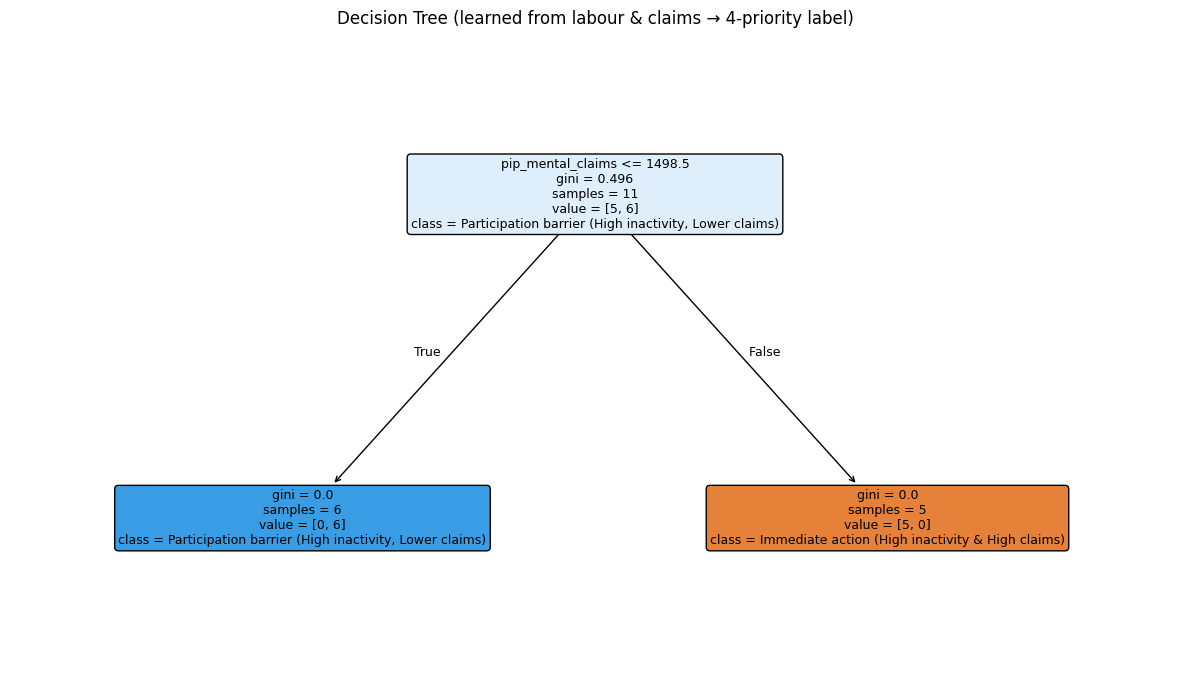


Prescriptive recommendations by borough:

| borough_name         |   employment_rate |   inactivity_rate |   pip_mental_claims |   pip_physical_claims | top_condition               | priority_4                                         | prescription                                                                                                                                                                         |
|----------------------|-------------------|-------------------|---------------------|-----------------------|-----------------------------|----------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Epsom and Ewell      |           65.5069 |           3533.33 |                1017 |                  1382 | Autistic spectrum disorders | Advocacy/monitor (Lower inactivity & Lower claims) | Light‑tou

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

work = df.copy()

work['total_claims'] = work['pip_mental_claims'] + work['pip_physical_claims']
thr_inact  = work['inactivity_rate'].median()
thr_claims = work['total_claims'].median()

def quad_label(row):
    hi_inact  = row['inactivity_rate'] > thr_inact
    hi_claims = row['total_claims']    > thr_claims
    if hi_inact and hi_claims:
        return "Immediate action (High inactivity & High claims)"
    elif hi_inact and not hi_claims:
        return "Participation barrier (High inactivity, Lower claims)"
    elif (not hi_inact) and hi_claims:
        return "Preventative health (Lower inactivity, High claims)"
    else:
        return "Advocacy/monitor (Lower inactivity & Lower claims)"

work['priority_4'] = work.apply(quad_label, axis=1)


if 'top_condition' not in work.columns:
    work['top_condition'] = 'Autistic spectrum disorders'

def prescribe(priority, cond):
    if priority.startswith("Immediate action"):
        return ("Scale direct services now; high-intensity counselling; "
                f"specialist pathway for {cond}; employment readiness; "
                "co-locate with Jobcentre/GP; employer partnerships.")
    if priority.startswith("Participation barrier"):
        return ("Activation focus; outreach to long‑term sick/NEET; "
                "navigation support; rapid access to counselling; "
                "work‑coaching taster sessions.")
    if priority.startswith("Preventative health"):
        return ("Group psycho‑education & brief therapy; "
                f"condition‑specific groups for {cond}; relapse prevention; "
                "early referral from primary care.")
    return ("Light‑touch advocacy; signposting; self‑management groups; "
            "maintain employer/college links; monitor trends.")

work['prescription'] = [prescribe(p, c) for p, c in zip(work['priority_4'], work['top_condition'])]

X_feats = ['employment_rate', 'inactivity_rate', 'weak_labour_market',
           'pip_mental_claims', 'pip_physical_claims']

class_names = [
    "Immediate action (High inactivity & High claims)",
    "Participation barrier (High inactivity, Lower claims)",
    "Preventative health (Lower inactivity, High claims)",
    "Advocacy/monitor (Lower inactivity & Lower claims)"
]
name_to_id = {n:i for i, n in enumerate(class_names)}
y = work['priority_4'].map(name_to_id).astype(int).values
X = work[X_feats].values

tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,              
    min_samples_leaf=1,
    random_state=42
).fit(X, y)

plt.figure(figsize=(12, 7))
plot_tree(
    tree,
    feature_names=X_feats,
    class_names=class_names,
    filled=True,
    rounded=True,
    impurity=True,
    proportion=False,
    fontsize=9
)
plt.title("Decision Tree (learned from labour & claims → 4-priority label)")
plt.tight_layout()
plt.show()

table_cols = ['borough_name', 'employment_rate', 'inactivity_rate',
              'pip_mental_claims', 'pip_physical_claims', 'top_condition',
              'priority_4', 'prescription']

print("\nPrescriptive recommendations by borough:\n")
print(tabulate(
    work[table_cols].sort_values('priority_4').reset_index(drop=True),
    headers='keys',
    tablefmt='github',
    showindex=False
))



In [ ]:
import pandas as pd
from tabulate import tabulate

prescriptions = [
    {"Borough": "Elmbridge", "Cluster Label": "A: High inactivity + high claims",
     "Top Condition": "Mixed anxiety & depressive disorders",
     "Prescribed Action": "Scale direct services: high-intensity counselling, autism/LD pathways, employment readiness, co-locate with jobcentres & GPs, add employer links.",
     "Rule": "pip_mental_claims ≤ 1498.5"},
    {"Borough": "Guildford", "Cluster Label": "A: High inactivity + high claims",
     "Top Condition": "Autistic spectrum disorders",
     "Prescribed Action": "Scale direct services: high-intensity counselling, autism/LD pathways, employment readiness, co-locate with jobcentres & GPs, add employer links.",
     "Rule": "pip_mental_claims ≤ 1498.5"},
    {"Borough": "Reigate and Banstead", "Cluster Label": "A: High inactivity + high claims",
     "Top Condition": "Autistic spectrum disorders",
     "Prescribed Action": "Scale direct services: high-intensity counselling, autism/LD pathways, employment readiness, co-locate with jobcentres & GPs, add employer links.",
     "Rule": "pip_mental_claims ≤ 1498.5"},
    {"Borough": "Spelthorne", "Cluster Label": "A: High inactivity + high claims",
     "Top Condition": "Mixed anxiety & depressive disorders",
     "Prescribed Action": "Scale direct services: high-intensity counselling, autism/LD pathways, employment readiness, co-locate with jobcentres & GPs, add employer links.",
     "Rule": "pip_mental_claims ≤ 1498.5"},
    {"Borough": "Waverley", "Cluster Label": "A: High inactivity + high claims",
     "Top Condition": "Autistic spectrum disorders",
     "Prescribed Action": "Scale direct services: high-intensity counselling, autism/LD pathways, employment readiness, co-locate with jobcentres & GPs, add employer links.",
     "Rule": "pip_mental_claims ≤ 1498.5"},
    {"Borough": "Epsom and Ewell", "Cluster Label": "B/C: Lower",
     "Top Condition": "Mixed anxiety & depressive disorders",
     "Prescribed Action": "Prevention & resilience: early-intervention groups, psycho-education, brief counselling for anxiety/depression, maintain light-touch employer outreach.",
     "Rule": "pip_mental_claims ≤ 1498.5"},
    {"Borough": "Mole Valley", "Cluster Label": "B/C: Lower",
     "Top Condition": "Autistic spectrum disorders",
     "Prescribed Action": "Prevention & resilience: early-intervention groups, psycho-education, brief counselling for anxiety/depression, maintain light-touch employer outreach.",
     "Rule": "pip_mental_claims ≤ 1498.5"},
    {"Borough": "Runnymede", "Cluster Label": "B/C: Lower",
     "Top Condition": "Autistic spectrum disorders",
     "Prescribed Action": "Prevention & resilience: early-intervention groups, psycho-education, brief counselling for anxiety/depression, maintain light-touch employer outreach.",
     "Rule": "pip_mental_claims ≤ 1498.5"},
    {"Borough": "Surrey Heath", "Cluster Label": "B/C: Lower",
     "Top Condition": "Autistic spectrum disorders",
     "Prescribed Action": "Prevention & resilience: early-intervention groups, psycho-education, brief counselling for anxiety/depression, maintain light-touch employer outreach.",
     "Rule": "pip_mental_claims ≤ 1498.5"},
    {"Borough": "Tandridge", "Cluster Label": "B/C: Lower",
     "Top Condition": "Autistic spectrum disorders",
     "Prescribed Action": "Prevention & resilience: early-intervention groups, psycho-education, brief counselling for anxiety/depression, maintain light-touch employer outreach.",
     "Rule": "pip_mental_claims ≤ 1498.5"},
    {"Borough": "Woking", "Cluster Label": "B/C: Lower",
     "Top Condition": "Autistic spectrum disorders",
     "Prescribed Action": "Prevention & resilience: early-intervention groups, psycho-education, brief counselling for anxiety/depression, maintain light-touch employer outreach.",
     "Rule": "pip_mental_claims ≤ 1498.5"}
]

prescriptions_df = pd.DataFrame(prescriptions)

print(tabulate(prescriptions_df, headers='keys', tablefmt='grid', showindex=False))

+----------------------+----------------------------------+--------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------+
| Borough              | Cluster Label                    | Top Condition                        | Prescribed Action                                                                                                                                       | Rule                       |
+======================+==================================+======================================+=========================================================================================================================================================+============================+
| Elmbridge            | A: High inactivity + high claims | Mixed anxiety & depressive disorders | Scale direct services: high-intensity counselling, auti